Deep HW - Q1<br/>
Soroosh Noorzad - 99205372

## Table Of Contents:
* [MLP - PART A: Run model for batch size of 32:](#MLPA32)
* [MLP - PART A: Run model for batch size of 64:](#MLPA64)
* [MLP - PART A: Run model for batch size of 256:](#MLPA256)
* [MLP - PART B: Change activation function (to tanh):](#MLPB)
* [MLP - PART C: change Loss metric:](#MLPC)
* [MLP - PART C+: Change Optimizer:](#MLPCP)
* [MLP - PART D: Best model with RECALL, Precision, F-Score:](#MLPD)
* [MLP - PART E & F: - Imbalanced Dataset:](#MLPEF)
    *   Make dataset imbalanced.
    *   Augmentation:
* [CNN - PART A:](#CNNA)
* [CNN - PART B:](#CNNB)
* [CNN - PART C:](#CNNC)

# MLP - PART A: Run model for batch size of 32:<a class="anchor" id="MLPA32"></a> 

Importing libraries.
TensorFlow version: 2.7.0
Libraries imported.

Reading data started.
Reading data finished.

Display first 10 Pictures.


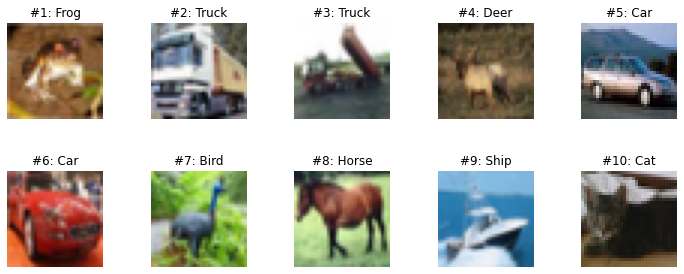

Displaying dataset features.


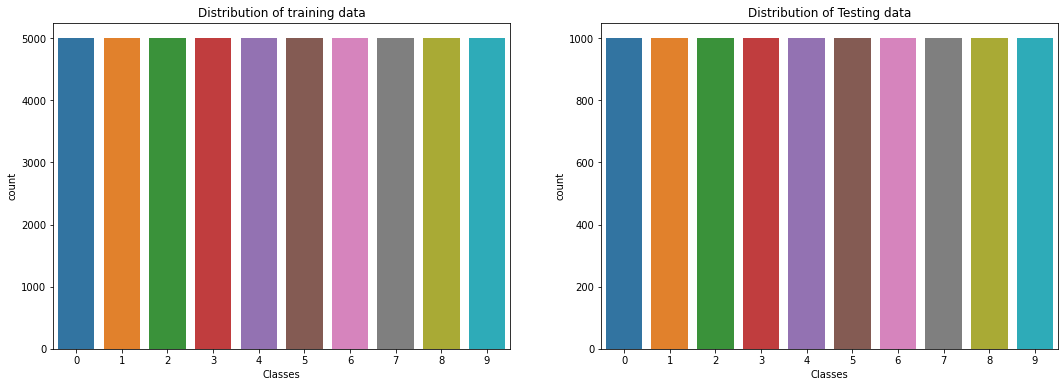

Creating the model.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FC1_h_128_relu (Dense)      (None, 128)               393344    
                                                                 
 FC2_h_128_relu (Dense)      (None, 128)               16512     
                                                                 
 FC3_o_10_Softmax (Dense)    (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________
Model created.

Learn the model, Batch size = 32
Epoch 1/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9190 - accuracy: 0.2965 - val_loss: 1.8097 - val_accuracy: 0.3455
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7739 - accuracy: 0.3570

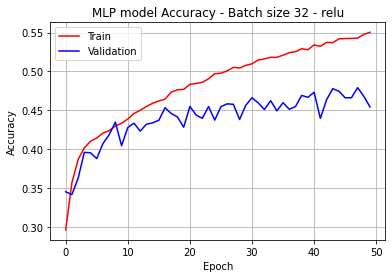


Plot the Loss Curves


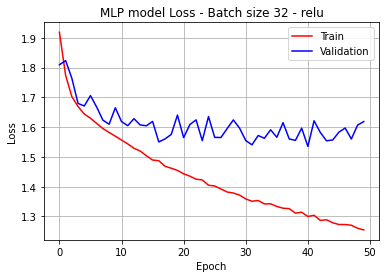


Test the model:
313/313 [==============================] - 1s 2ms/step - loss: 1.5805 - accuracy: 0.4619
Test Loss: 1.580502986907959 , Test Accuracy: 0.461899995803833

Plot Confusion Matrix:


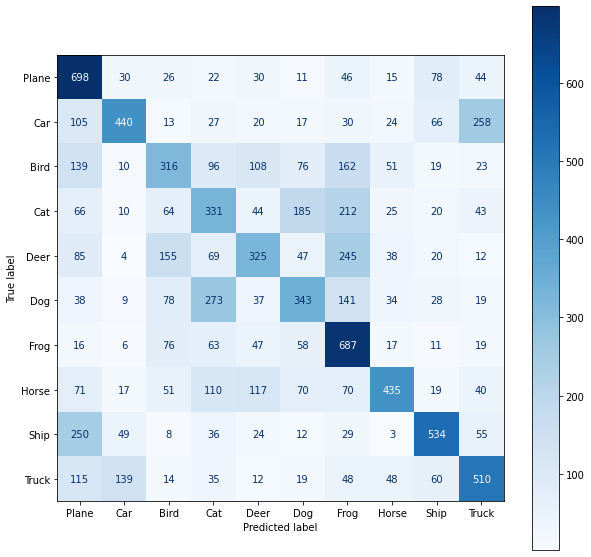

Job is done. learning time: 339 seconds


In [2]:
# Import TF and other requirements
print("Importing libraries.")
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import datasets, layers, models, Sequential, optimizers
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Import General libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import os

# Read Data
from six.moves import cPickle as pickle
import ssl
from keras.datasets import cifar10
import seaborn as sns

# Draw Flow chart
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

print("Libraries imported.\n")
# Creating directories if not exist.
from pathlib import Path
Path("figs").mkdir(parents=True, exist_ok=True)
Path("models").mkdir(parents=True, exist_ok=True)


# Defines:
question_part = "Q1PA"
model_type = "MLP"

# Hyper-Parameters
num_training=49000
num_validation=1000
num_test=10000
# database path
data_path = 'cifar10'
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_count = len(classes)
# Optimizer type: adam, sgd
opt_type = 'sgd'
# Batch Size:
bs = 32
# Activation Function:
act_func = 'relu'
# Epoch count:
ep_count = 50
# Loss metric:
loss_metric = 'categorical_crossentropy'

def model_plotter(model_history, metric, model_name, b_s, a_f):
    plt.figure()
    plt.plot(model_history.history[metric.lower()],'r')
    plt.plot(model_history.history['val_'+metric.lower()],'b')
    plt.title(model_name + ' model ' + metric.capitalize() + " - Batch size " + str(b_s) + " - " + a_f)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.savefig("figs/" + question_part + "_" + model_name + "_" + metric.lower() + "_" + str(b_s) + "_" + a_f + ".png")
    plt.show()

def show_img(x, y, index):
    # Show images one by one
    for i in index:
        plt.figure()
        plt.imshow(x[i])
        plt.xlabel("#" + str(i+1) + ": " + classes[y[i]])
        plt.savefig("figs/" + question_part + "_fig_"+str(i+1)+'.png')
        plt.show()

def showImages(num_row,num_col,X,Y):
    # Show images all together
    fig, axes = plt.subplots(num_row,num_col,figsize = (12, 5))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X[i])
        axes[i].set_title("{}".format("#" + str(i+1) + ": " + classes[Y.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace=0.5)
    plt.savefig("figs/" + question_part + "_first" + str(num_row*num_col) + ".png")
    plt.show()

def read_data(path='cifar10'):
    xs = []
    ys = []
    for b in range(1,6):
        # load single batch of cifar
        filename = os.path.join(path, 'data_batch_%d' % (b, ))
        with open(filename, 'rb') as f:
            datadict = pickle.load(f, encoding='latin1')
            X = datadict['data'].reshape(10000, 3072)
            Y = np.array(datadict['labels'])
        xs.append(X)
        ys.append(Y)

    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    with open(os.path.join(path, 'test_batch'), 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        Xte = datadict['data'].reshape(10000, 3072)
        Yte = np.array(datadict['labels'])
    
    # Subsample the data
    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)
    x_val = Xtr[r_val].astype('float32')/255.0
    y_val = Ytr[r_val]

    # We can split data here, but we don't want.
    # x_train = Xtr[r_tr].astype('float32')/255.0
    # y_train = Ytr[r_tr]
    x_train = Xtr.astype('float32')/255.0
    y_train = Ytr

    x_test = Xte[r_te].astype('float32')/255.0
    y_test = Yte[r_te]
    return x_train, y_train, x_val, y_val, x_test, y_test

print("Reading data started.")
read_data_online = True
if read_data_online:
    # Read data, using Keras (Needs download):
    ssl._create_default_https_context = ssl._create_unverified_context
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)

    x_val = x_train[r_val].astype('float32')/255.0
    y_val = y_train[r_val]
    # x_train = x_train[r_tr].astype('float32')/255.0
    x_train = x_train.astype('float32')/255.0
    # y_train = y_train[r_tr]
    x_test = x_test[r_te].astype('float32')/255.0
    y_test = y_test[r_te]
    xtr_img = x_train
    xte_img = x_test
else:
    # Read data, using the defined function (locally - Downloaded file):
    x_train, y_train, x_val, y_val, x_test, y_test = read_data(data_path)
    xtr_img = x_train.reshape(len(x_train), 3, 32, 32).transpose([0, 2, 3, 1])
    xte_img = x_test.reshape(len(x_test), 3, 32, 32).transpose([0, 2, 3, 1])

# Making classes one hot for the sake of model training:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, class_count)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, class_count)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, class_count)

print("Reading data finished.\n")

print("Display first 10 Pictures.")
# Reshaping and preparing the pictures to show:
ytr_lbl = y_train.reshape(-1,)
yte_lbl = y_test.reshape(-1,)
# Display all together:
showImages(2, 5, X=xtr_img, Y=ytr_lbl)
# Display one by one:
# show_img(xtr_img, ytr_lbl, [i for i in range(10)])

# Dataset features: visulization with seaborn (class count in train and test data)
print("Displaying dataset features.")
# Count plot for training set
figure, axis = plt.subplots( 1, 2 , figsize = (18,6))
sns.countplot(x=y_train.ravel(),ax = axis[0])
axis[0].set_title('Distribution of training data')
axis[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(x=y_test.ravel(), ax=axis[1])
axis[1].set_title('Distribution of Testing data')
axis[1].set_xlabel('Classes')
plt.savefig("figs/" + question_part + "_dist.png")
plt.show()

print("Creating the model.")
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (3072)))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC1_h_128_' + act_func))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC2_h_128_' + act_func))
model.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'FC3_o_10_Softmax'))
if opt_type=='adam':
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0009)
else:
    # opt_type=='sgd'
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, name=opt_type.upper())
model.compile(optimizer = opt, loss = loss_metric, metrics = ['accuracy'])
model.summary()

print("Model created.\n")
# Flow chart of the model (It will be saved on figs folder):
plot_model(model, to_file="figs/" + question_part + "_model.png")
SVG(model_to_dot(model).create(prog='dot', format='svg'))

print("Learn the model, Batch size =", bs)
t = time.time()
model_learning = model.fit(x_train.reshape(len(x_train),-1), y_train_one_hot, epochs = ep_count, batch_size=bs, validation_split=0.2, shuffle=True)
t = time.time()-t

print("\nPlot the Accuracy Curves")
model_plotter(model_learning, 'accuracy', model_type, bs, act_func)

print("\nPlot the Loss Curves")
model_plotter(model_learning, 'loss', model_type, bs, act_func)

model.save("models/cifar10_" + question_part + "_" + model_type + "_bs" + str(bs) + "_" + act_func + ".h5")

# Model Testing:
print("\nTest the model:")
model_test_result = model.evaluate(x_test.reshape(len(x_test),-1), y_test_one_hot)
print("Test Loss:", model_test_result[0], ", Test Accuracy:", model_test_result[1])

print("\nPlot Confusion Matrix:")
# Confusion Matrix:
y_pred_softmax = model.predict(x_test.reshape(len(x_test),-1))
y_pred = [np.argmax(y) for y in y_pred_softmax]

cm = confusion_matrix(y_test, y_pred)
plt.rcParams["figure.figsize"] = (10,10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("figs/" + question_part + "_" + model_type + "_confusion_" + str(bs) + "_" + act_func +  ".png")
plt.show()

print("Job is done. learning time:", int(t), "seconds")

# MLP - PART A: Run model for batch size of 64:<a class="anchor" id="MLPA64"></a>

Importing libraries.
TensorFlow version: 2.7.0
Libraries imported.

Reading data started.
Reading data finished.

Creating the model.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FC1_h_128_relu (Dense)      (None, 128)               393344    
                                                                 
 FC2_h_128_relu (Dense)      (None, 128)               16512     
                                                                 
 FC3_o_10_Softmax (Dense)    (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________
Model created.

Learn the model, Batch size = 64
Epoch 1/50
625/625 [==============================] - 5s 7ms/step - loss: 1.8853 - accuracy: 0.3160 - val_loss: 1.7595 - val_accu

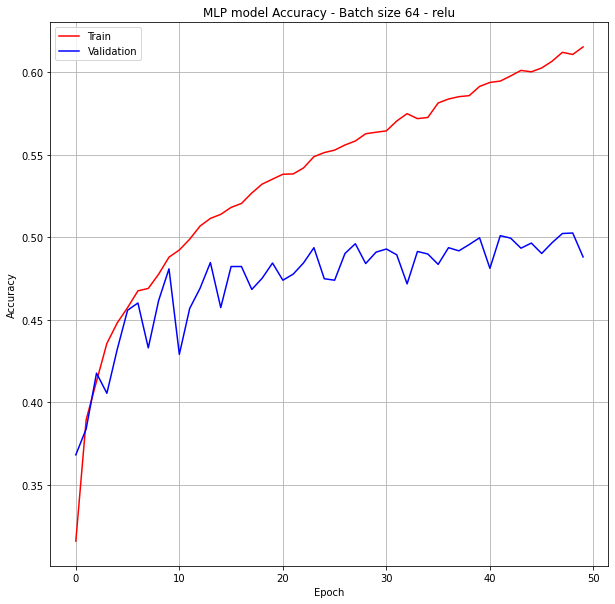


Plot the Loss Curves


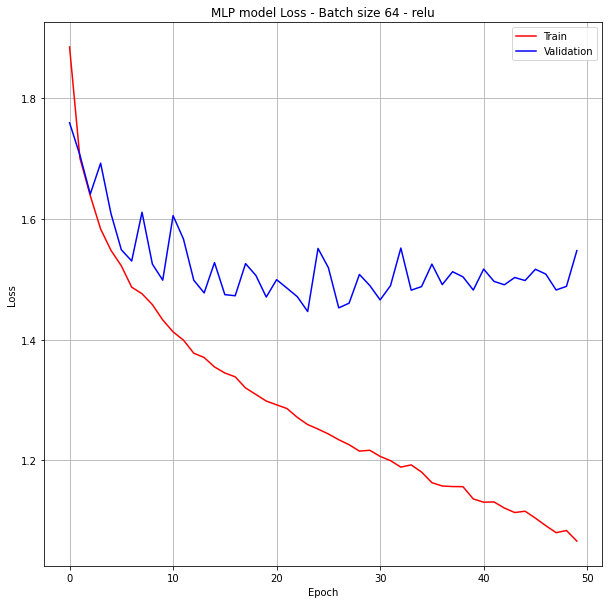


Test the model:
313/313 [==============================] - 1s 2ms/step - loss: 1.5302 - accuracy: 0.4872
Test Loss: 1.5302077531814575 , Test Accuracy: 0.487199991941452

Plot Confusion Matrix:


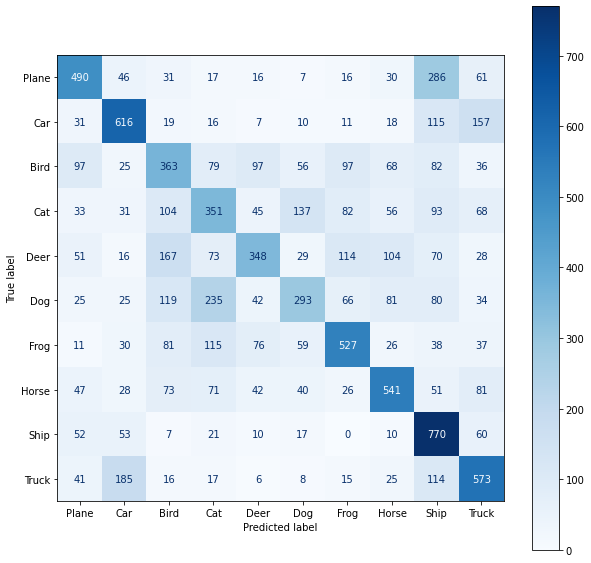

Job is done. learning time: 262 seconds


In [3]:
# Import TF and other requirements
print("Importing libraries.")
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import datasets, layers, models, Sequential, optimizers
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Import General libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import os

# Read Data
from six.moves import cPickle as pickle
import ssl
from keras.datasets import cifar10
import seaborn as sns

# Draw Flow chart
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

print("Libraries imported.\n")
# Creating directories if not exist.
from pathlib import Path
Path("figs").mkdir(parents=True, exist_ok=True)
Path("models").mkdir(parents=True, exist_ok=True)

# Defines:
question_part = "Q1PA"
model_type = "MLP"

# Hyper-Parameters
num_training=49000
num_validation=1000
num_test=10000
# database path
data_path = 'cifar10'
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_count = len(classes)
# Optimizer type: sgd, adam
opt_type = 'sgd'
# Batch Size:
bs = 64
# Activation Function:
act_func = 'relu'
# Epoch count:
ep_count = 50
# Loss metric:
loss_metric = 'categorical_crossentropy'

def model_plotter(model_history, metric, model_name, b_s, a_f):
    plt.figure()
    plt.plot(model_history.history[metric.lower()],'r')
    plt.plot(model_history.history['val_'+metric.lower()],'b')
    plt.title(model_name + ' model ' + metric.capitalize() + " - Batch size " + str(b_s) + " - " + a_f)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.savefig("figs/" + question_part + "_" + model_name + "_" + metric.lower() + "_" + str(b_s) + "_" + a_f + ".png")
    plt.show()

def read_data(path='cifar10'):
    xs = []
    ys = []
    for b in range(1,6):
        # load single batch of cifar
        filename = os.path.join(path, 'data_batch_%d' % (b, ))
        with open(filename, 'rb') as f:
            datadict = pickle.load(f, encoding='latin1')
            X = datadict['data'].reshape(10000, 3072)
            Y = np.array(datadict['labels'])
        xs.append(X)
        ys.append(Y)

    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    with open(os.path.join(path, 'test_batch'), 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        Xte = datadict['data'].reshape(10000, 3072)
        Yte = np.array(datadict['labels'])
    
    # Subsample the data
    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)
    x_val = Xtr[r_val].astype('float32')/255.0
    y_val = Ytr[r_val]

    # We can split data here, but we don't want.
    # x_train = Xtr[r_tr].astype('float32')/255.0
    # y_train = Ytr[r_tr]
    x_train = Xtr.astype('float32')/255.0
    y_train = Ytr

    x_test = Xte[r_te].astype('float32')/255.0
    y_test = Yte[r_te]
    return x_train, y_train, x_val, y_val, x_test, y_test

print("Reading data started.")
read_data_online = True
if read_data_online:
    # Read data, using Keras (Needs download):
    ssl._create_default_https_context = ssl._create_unverified_context
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)

    x_val = x_train[r_val].astype('float32')/255.0
    y_val = y_train[r_val]
    # x_train = x_train[r_tr].astype('float32')/255.0
    x_train = x_train.astype('float32')/255.0
    # y_train = y_train[r_tr]
    x_test = x_test[r_te].astype('float32')/255.0
    y_test = y_test[r_te]
    xtr_img = x_train
    xte_img = x_test
else:
    # Read data, using the defined function (locally - Downloaded file):
    x_train, y_train, x_val, y_val, x_test, y_test = read_data(data_path)
    xtr_img = x_train.reshape(len(x_train), 3, 32, 32).transpose([0, 2, 3, 1])
    xte_img = x_test.reshape(len(x_test), 3, 32, 32).transpose([0, 2, 3, 1])

# Making classes one hot for the sake of model training:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, class_count)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, class_count)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, class_count)

print("Reading data finished.\n")

print("Creating the model.")
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (3072)))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC1_h_128_' + act_func))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC2_h_128_' + act_func))
model.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'FC3_o_10_Softmax'))
if opt_type=='adam':
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0009)
else:
    # opt_type=='sgd'
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, name=opt_type.upper())
model.compile(optimizer = opt, loss = loss_metric, metrics = ['accuracy'])
model.summary()

print("Model created.\n")

print("Learn the model, Batch size =", bs)
t = time.time()
model_learning = model.fit(x_train.reshape(len(x_train),-1), y_train_one_hot, epochs = ep_count, batch_size=bs, validation_split=0.2, shuffle=True)
t = time.time()-t

print("\nPlot the Accuracy Curves")
model_plotter(model_learning, 'accuracy', model_type, bs, act_func)

print("\nPlot the Loss Curves")
model_plotter(model_learning, 'loss', model_type, bs, act_func)

model.save("models/cifar10_" + question_part + "_" + model_type + "_bs" + str(bs) + "_" + act_func + ".h5")

# Model Testing:
print("\nTest the model:")
model_test_result = model.evaluate(x_test.reshape(len(x_test),-1), y_test_one_hot)
print("Test Loss:", model_test_result[0], ", Test Accuracy:", model_test_result[1])

print("\nPlot Confusion Matrix:")
# Confusion Matrix:
y_pred_softmax = model.predict(x_test.reshape(len(x_test),-1))
y_pred = [np.argmax(y) for y in y_pred_softmax]

cm = confusion_matrix(y_test, y_pred)
plt.rcParams["figure.figsize"] = (10,10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("figs/" + question_part + "_" + model_type + "_confusion_" + str(bs) + "_" + act_func +  ".png")
plt.show()

print("Job is done. learning time:", int(t), "seconds")

# MLP - PART A: Run model for batch size of 256:<a class="anchor" id="MLPA256"></a>

Importing libraries.
TensorFlow version: 2.7.0
Libraries imported.

Reading data started.
Reading data finished.

Creating the model.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FC1_h_128_relu (Dense)      (None, 128)               393344    
                                                                 
 FC2_h_128_relu (Dense)      (None, 128)               16512     
                                                                 
 FC3_o_10_Softmax (Dense)    (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________
Model created.

Learn the model, Batch size = 256
Epoch 1/50
157/157 [==============================] - 3s 17ms/step - loss: 1.9387 - accuracy: 0.3001 - val_loss: 1.8050 - val_ac

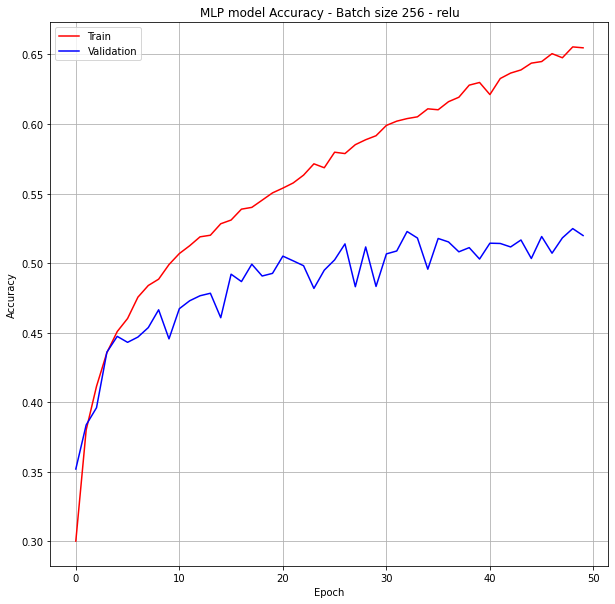


Plot the Loss Curves


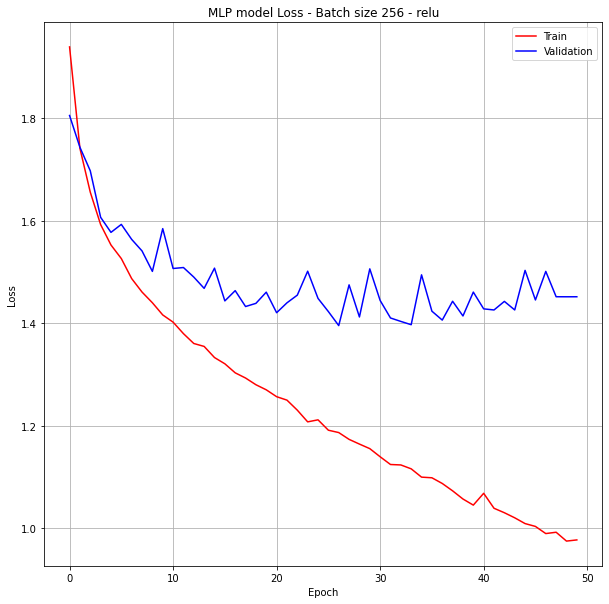


Test the model:
313/313 [==============================] - 1s 2ms/step - loss: 1.4214 - accuracy: 0.5204
Test Loss: 1.4214214086532593 , Test Accuracy: 0.5203999876976013

Plot Confusion Matrix:


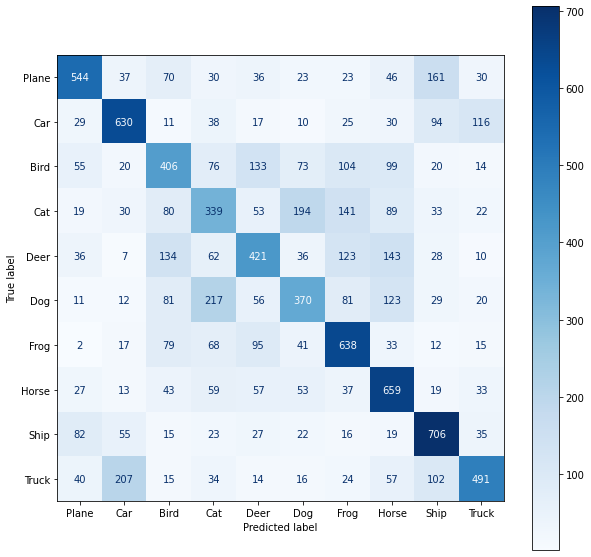

Job is done. learning time: 125 seconds


In [4]:
# Import TF and other requirements
print("Importing libraries.")
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import datasets, layers, models, Sequential, optimizers
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Import General libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import os

# Read Data
from six.moves import cPickle as pickle
import ssl
from keras.datasets import cifar10
import seaborn as sns

# Draw Flow chart
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

print("Libraries imported.\n")
# Creating directories if not exist.
from pathlib import Path
Path("figs").mkdir(parents=True, exist_ok=True)
Path("models").mkdir(parents=True, exist_ok=True)

# Defines:
question_part = "Q1PA"
model_type = "MLP"

# Hyper-Parameters
num_training=49000
num_validation=1000
num_test=10000
# database path
data_path = 'cifar10'
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_count = len(classes)
# Optimizer type: sgd, adam
opt_type = 'sgd'
# Batch Size:
bs = 256
# Activation Function:
act_func = 'relu'
# Epoch count:
ep_count = 50
# Loss metric:
loss_metric = 'categorical_crossentropy'

def model_plotter(model_history, metric, model_name, b_s, a_f):
    plt.figure()
    plt.plot(model_history.history[metric.lower()],'r')
    plt.plot(model_history.history['val_'+metric.lower()],'b')
    plt.title(model_name + ' model ' + metric.capitalize() + " - Batch size " + str(b_s) + " - " + a_f)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.savefig("figs/" + question_part + "_" + model_name + "_" + metric.lower() + "_" + str(b_s) + "_" + a_f + ".png")
    plt.show()

def read_data(path='cifar10'):
    xs = []
    ys = []
    for b in range(1,6):
        # load single batch of cifar
        filename = os.path.join(path, 'data_batch_%d' % (b, ))
        with open(filename, 'rb') as f:
            datadict = pickle.load(f, encoding='latin1')
            X = datadict['data'].reshape(10000, 3072)
            Y = np.array(datadict['labels'])
        xs.append(X)
        ys.append(Y)

    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    with open(os.path.join(path, 'test_batch'), 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        Xte = datadict['data'].reshape(10000, 3072)
        Yte = np.array(datadict['labels'])
    
    # Subsample the data
    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)
    x_val = Xtr[r_val].astype('float32')/255.0
    y_val = Ytr[r_val]

    # We can split data here, but we don't want.
    # x_train = Xtr[r_tr].astype('float32')/255.0
    # y_train = Ytr[r_tr]
    x_train = Xtr.astype('float32')/255.0
    y_train = Ytr

    x_test = Xte[r_te].astype('float32')/255.0
    y_test = Yte[r_te]
    return x_train, y_train, x_val, y_val, x_test, y_test

print("Reading data started.")
read_data_online = True
if read_data_online:
    # Read data, using Keras (Needs download):
    ssl._create_default_https_context = ssl._create_unverified_context
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)

    x_val = x_train[r_val].astype('float32')/255.0
    y_val = y_train[r_val]
    # x_train = x_train[r_tr].astype('float32')/255.0
    x_train = x_train.astype('float32')/255.0
    # y_train = y_train[r_tr]
    x_test = x_test[r_te].astype('float32')/255.0
    y_test = y_test[r_te]
    xtr_img = x_train
    xte_img = x_test
else:
    # Read data, using the defined function (locally - Downloaded file):
    x_train, y_train, x_val, y_val, x_test, y_test = read_data(data_path)
    xtr_img = x_train.reshape(len(x_train), 3, 32, 32).transpose([0, 2, 3, 1])
    xte_img = x_test.reshape(len(x_test), 3, 32, 32).transpose([0, 2, 3, 1])

# Making classes one hot for the sake of model training:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, class_count)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, class_count)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, class_count)

print("Reading data finished.\n")

print("Creating the model.")
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (3072)))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC1_h_128_' + act_func))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC2_h_128_' + act_func))
model.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'FC3_o_10_Softmax'))
if opt_type=='adam':
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0009)
else:
    # opt_type=='sgd'
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, name=opt_type.upper())
model.compile(optimizer = opt, loss = loss_metric, metrics = ['accuracy'])
model.summary()

print("Model created.\n")

print("Learn the model, Batch size =", bs)
t = time.time()
model_learning = model.fit(x_train.reshape(len(x_train),-1), y_train_one_hot, epochs = ep_count, batch_size=bs, validation_split=0.2, shuffle=True)
t = time.time()-t

print("\nPlot the Accuracy Curves")
model_plotter(model_learning, 'accuracy', model_type, bs, act_func)

print("\nPlot the Loss Curves")
model_plotter(model_learning, 'loss', model_type, bs, act_func)

model.save("models/cifar10_" + question_part + "_" + model_type + "_bs" + str(bs) + "_" + act_func + ".h5")

# Model Testing:
print("\nTest the model:")
model_test_result = model.evaluate(x_test.reshape(len(x_test),-1), y_test_one_hot)
print("Test Loss:", model_test_result[0], ", Test Accuracy:", model_test_result[1])

print("\nPlot Confusion Matrix:")
# Confusion Matrix:
y_pred_softmax = model.predict(x_test.reshape(len(x_test),-1))
y_pred = [np.argmax(y) for y in y_pred_softmax]

cm = confusion_matrix(y_test, y_pred)
plt.rcParams["figure.figsize"] = (10,10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("figs/" + question_part + "_" + model_type + "_confusion_" + str(bs) + "_" + act_func +  ".png")
plt.show()

print("Job is done. learning time:", int(t), "seconds")

# MLP - PART B: Change activation function (to tanh):<a class="anchor" id="MLPB"></a>

Importing libraries.
TensorFlow version: 2.7.0
Libraries imported.

Reading data started.
Reading data finished.

Creating the model.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FC1_h_128_tanh (Dense)      (None, 128)               393344    
                                                                 
 FC2_h_128_tanh (Dense)      (None, 128)               16512     
                                                                 
 FC3_o_10_Softmax (Dense)    (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________
Model created.

Learn the model, Batch size = 256
Epoch 1/50
157/157 [==============================] - 5s 30ms/step - loss: 1.9297 - accuracy: 0.3031 - val_loss: 1.8246 - val_ac

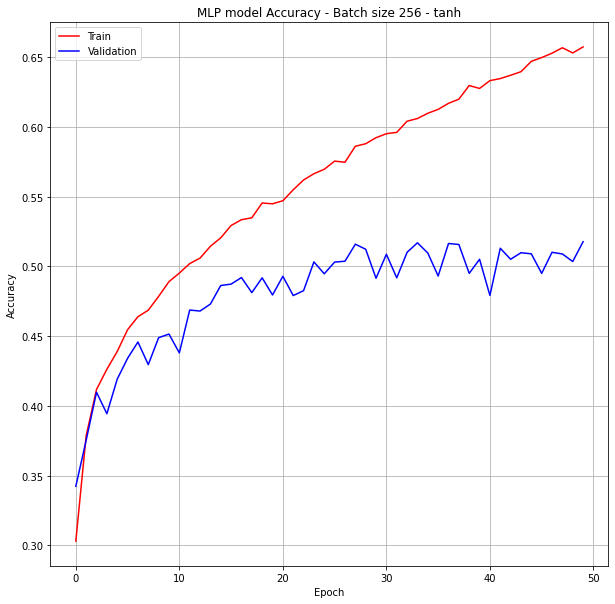


Plot the Loss Curves


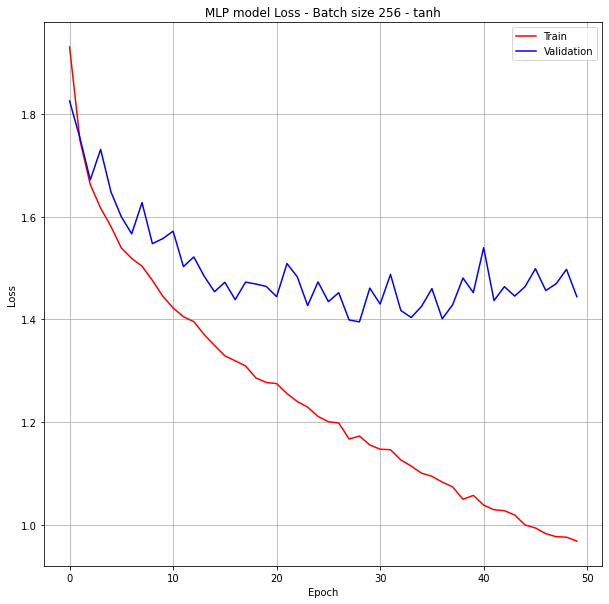


Test the model:
313/313 [==============================] - 1s 2ms/step - loss: 1.4464 - accuracy: 0.5161
Test Loss: 1.446381688117981 , Test Accuracy: 0.5160999894142151

Plot Confusion Matrix:


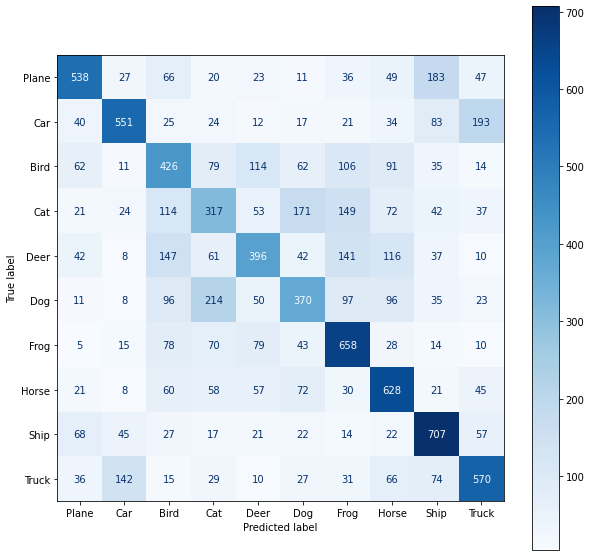

Job is done. learning time: 131 seconds


In [5]:
# Import TF and other requirements
print("Importing libraries.")
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import datasets, layers, models, Sequential, optimizers
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Import General libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import os

# Read Data
from six.moves import cPickle as pickle
import ssl
from keras.datasets import cifar10
import seaborn as sns

# Draw Flow chart
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

print("Libraries imported.\n")
# Creating directories if not exist.
from pathlib import Path
Path("figs").mkdir(parents=True, exist_ok=True)
Path("models").mkdir(parents=True, exist_ok=True)

# Defines:
question_part = "Q1PB"
model_type = "MLP"

# Hyper-Parameters
num_training=49000
num_validation=1000
num_test=10000
# database path
data_path = 'cifar10'
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_count = len(classes)
# Optimizer type: sgd, adam
opt_type = 'sgd'
# Batch Size:
bs = 256
# Activation Function:
act_func = 'tanh'
# Epoch count:
ep_count = 50
# Loss metric:
loss_metric = 'categorical_crossentropy'

def model_plotter(model_history, metric, model_name, b_s, a_f):
    plt.figure()
    plt.plot(model_history.history[metric.lower()],'r')
    plt.plot(model_history.history['val_'+metric.lower()],'b')
    plt.title(model_name + ' model ' + metric.capitalize() + " - Batch size " + str(b_s) + " - " + a_f)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.savefig("figs/" + question_part + "_" + model_name + "_" + metric.lower() + "_" + str(b_s) + "_" + a_f + ".png")
    plt.show()

def read_data(path='cifar10'):
    xs = []
    ys = []
    for b in range(1,6):
        # load single batch of cifar
        filename = os.path.join(path, 'data_batch_%d' % (b, ))
        with open(filename, 'rb') as f:
            datadict = pickle.load(f, encoding='latin1')
            X = datadict['data'].reshape(10000, 3072)
            Y = np.array(datadict['labels'])
        xs.append(X)
        ys.append(Y)

    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    with open(os.path.join(path, 'test_batch'), 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        Xte = datadict['data'].reshape(10000, 3072)
        Yte = np.array(datadict['labels'])
    
    # Subsample the data
    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)
    x_val = Xtr[r_val].astype('float32')/255.0
    y_val = Ytr[r_val]

    # We can split data here, but we don't want.
    # x_train = Xtr[r_tr].astype('float32')/255.0
    # y_train = Ytr[r_tr]
    x_train = Xtr.astype('float32')/255.0
    y_train = Ytr

    x_test = Xte[r_te].astype('float32')/255.0
    y_test = Yte[r_te]
    return x_train, y_train, x_val, y_val, x_test, y_test

print("Reading data started.")
read_data_online = True
if read_data_online:
    # Read data, using Keras (Needs download):
    ssl._create_default_https_context = ssl._create_unverified_context
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)

    x_val = x_train[r_val].astype('float32')/255.0
    y_val = y_train[r_val]
    # x_train = x_train[r_tr].astype('float32')/255.0
    x_train = x_train.astype('float32')/255.0
    # y_train = y_train[r_tr]
    x_test = x_test[r_te].astype('float32')/255.0
    y_test = y_test[r_te]
    xtr_img = x_train
    xte_img = x_test
else:
    # Read data, using the defined function (locally - Downloaded file):
    x_train, y_train, x_val, y_val, x_test, y_test = read_data(data_path)
    xtr_img = x_train.reshape(len(x_train), 3, 32, 32).transpose([0, 2, 3, 1])
    xte_img = x_test.reshape(len(x_test), 3, 32, 32).transpose([0, 2, 3, 1])

# Making classes one hot for the sake of model training:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, class_count)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, class_count)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, class_count)

print("Reading data finished.\n")

print("Creating the model.")
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (3072)))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC1_h_128_' + act_func))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC2_h_128_' + act_func))
model.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'FC3_o_10_Softmax'))
if opt_type=='adam':
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0009)
else:
    # opt_type=='sgd'
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, name=opt_type.upper())
model.compile(optimizer = opt, loss = loss_metric, metrics = ['accuracy'])
model.summary()

print("Model created.\n")

print("Learn the model, Batch size =", bs)
t = time.time()
model_learning = model.fit(x_train.reshape(len(x_train),-1), y_train_one_hot, epochs = ep_count, batch_size=bs, validation_split=0.2, shuffle=True)
t = time.time()-t

print("\nPlot the Accuracy Curves")
model_plotter(model_learning, 'accuracy', model_type, bs, act_func)

print("\nPlot the Loss Curves")
model_plotter(model_learning, 'loss', model_type, bs, act_func)

model.save("models/cifar10_" + question_part + "_" + model_type + "_bs" + str(bs) + "_" + act_func + ".h5")

# Model Testing:
print("\nTest the model:")
model_test_result = model.evaluate(x_test.reshape(len(x_test),-1), y_test_one_hot)
print("Test Loss:", model_test_result[0], ", Test Accuracy:", model_test_result[1])

print("\nPlot Confusion Matrix:")
# Confusion Matrix:
y_pred_softmax = model.predict(x_test.reshape(len(x_test),-1))
y_pred = [np.argmax(y) for y in y_pred_softmax]

cm = confusion_matrix(y_test, y_pred)
plt.rcParams["figure.figsize"] = (10,10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("figs/" + question_part + "_" + model_type + "_confusion_" + str(bs) + "_" + act_func +  ".png")
plt.show()

print("Job is done. learning time:", int(t), "seconds")

# MLP - PART C: change Loss metric:<a class="anchor" id="MLPC"></a>

Creating a model with another loss metric (Categorical Cross Entropy => MSE):

Importing libraries.
TensorFlow version: 2.7.0
Libraries imported.

Reading data started.
Reading data finished.

Creating the model.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FC1_h_128_tanh (Dense)      (None, 128)               393344    
                                                                 
 FC2_h_128_tanh (Dense)      (None, 128)               16512     
                                                                 
 FC3_o_10_Softmax (Dense)    (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________
Model created.

Learn the model, Batch size = 256
Epoch 1/50
157/157 [==============================] - 3s 17ms/step - loss: 0.0891 - accuracy: 0.1774 - val_loss: 0.0864 - val_ac

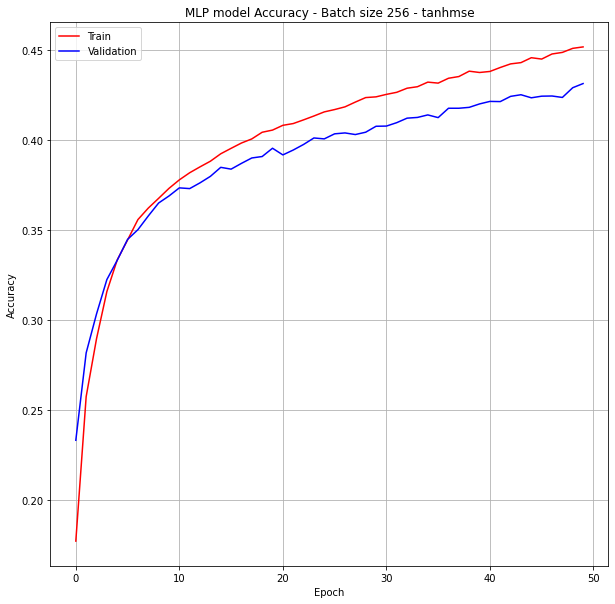


Plot the Loss Curves


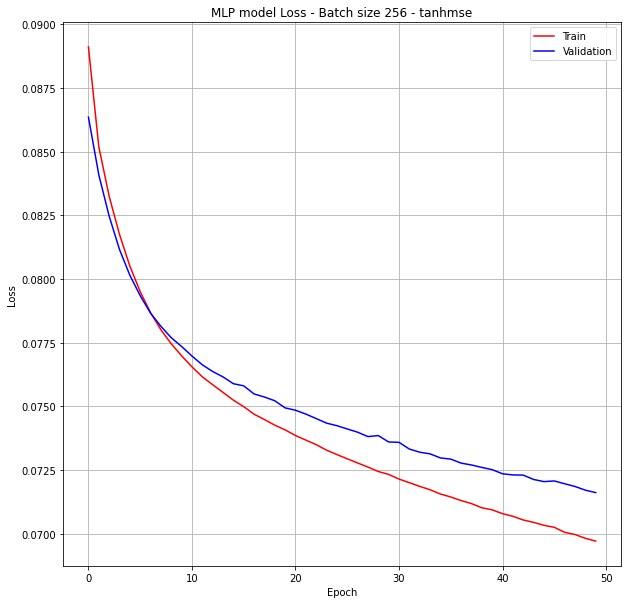


Test the model:
313/313 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.4305
Test Loss: 0.07104981690645218 , Test Accuracy: 0.43050000071525574

Plot Confusion Matrix:


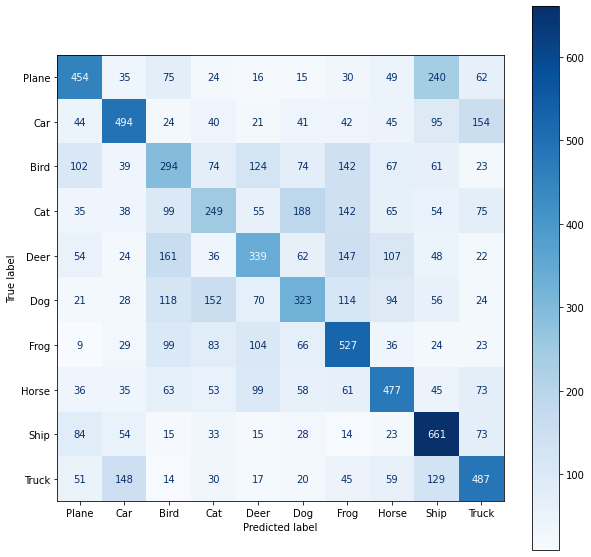

Job is done. learning time: 126 seconds


In [6]:
# Import TF and other requirements
print("Importing libraries.")
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import datasets, layers, models, Sequential, optimizers
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Import General libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import os

# Read Data
from six.moves import cPickle as pickle
import ssl
from keras.datasets import cifar10
import seaborn as sns

# Draw Flow chart
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

print("Libraries imported.\n")
# Creating directories if not exist.
from pathlib import Path
Path("figs").mkdir(parents=True, exist_ok=True)
Path("models").mkdir(parents=True, exist_ok=True)

# Defines:
question_part = "Q1PC"
model_type = "MLP"

# Hyper-Parameters
num_training=49000
num_validation=1000
num_test=10000
# database path
data_path = 'cifar10'
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_count = len(classes)
# Optimizer type: sgd, adam
opt_type = 'sgd'
# Batch Size:
bs = 256
# Activation Function:
act_func = 'tanh'
# Epoch count:
ep_count = 50
# Loss metric:
loss_metric = 'mse'

def model_plotter(model_history, metric, model_name, b_s, a_f):
    plt.figure()
    plt.plot(model_history.history[metric.lower()],'r')
    plt.plot(model_history.history['val_'+metric.lower()],'b')
    plt.title(model_name + ' model ' + metric.capitalize() + " - Batch size " + str(b_s) + " - " + a_f)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.savefig("figs/" + question_part + "_" + model_name + "_" + metric.lower() + "_" + str(b_s) + "_" + a_f + ".png")
    plt.show()

def read_data(path='cifar10'):
    xs = []
    ys = []
    for b in range(1,6):
        # load single batch of cifar
        filename = os.path.join(path, 'data_batch_%d' % (b, ))
        with open(filename, 'rb') as f:
            datadict = pickle.load(f, encoding='latin1')
            X = datadict['data'].reshape(10000, 3072)
            Y = np.array(datadict['labels'])
        xs.append(X)
        ys.append(Y)

    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    with open(os.path.join(path, 'test_batch'), 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        Xte = datadict['data'].reshape(10000, 3072)
        Yte = np.array(datadict['labels'])
    
    # Subsample the data
    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)
    x_val = Xtr[r_val].astype('float32')/255.0
    y_val = Ytr[r_val]

    # We can split data here, but we don't want.
    # x_train = Xtr[r_tr].astype('float32')/255.0
    # y_train = Ytr[r_tr]
    x_train = Xtr.astype('float32')/255.0
    y_train = Ytr

    x_test = Xte[r_te].astype('float32')/255.0
    y_test = Yte[r_te]
    return x_train, y_train, x_val, y_val, x_test, y_test

print("Reading data started.")
read_data_online = True
if read_data_online:
    # Read data, using Keras (Needs download):
    ssl._create_default_https_context = ssl._create_unverified_context
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)

    x_val = x_train[r_val].astype('float32')/255.0
    y_val = y_train[r_val]
    # x_train = x_train[r_tr].astype('float32')/255.0
    x_train = x_train.astype('float32')/255.0
    # y_train = y_train[r_tr]
    x_test = x_test[r_te].astype('float32')/255.0
    y_test = y_test[r_te]
    xtr_img = x_train
    xte_img = x_test
else:
    # Read data, using the defined function (locally - Downloaded file):
    x_train, y_train, x_val, y_val, x_test, y_test = read_data(data_path)
    xtr_img = x_train.reshape(len(x_train), 3, 32, 32).transpose([0, 2, 3, 1])
    xte_img = x_test.reshape(len(x_test), 3, 32, 32).transpose([0, 2, 3, 1])

# Making classes one hot for the sake of model training:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, class_count)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, class_count)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, class_count)

print("Reading data finished.\n")

print("Creating the model.")
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (3072)))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC1_h_128_' + act_func))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC2_h_128_' + act_func))
model.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'FC3_o_10_Softmax'))
if opt_type=='adam':
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0009)
else:
    # opt_type=='sgd'
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, name=opt_type.upper())
model.compile(optimizer = opt, loss = loss_metric, metrics = ['accuracy'])
model.summary()

print("Model created.\n")

print("Learn the model, Batch size =", bs)
t = time.time()
model_learning = model.fit(x_train.reshape(len(x_train),-1), y_train_one_hot, epochs = ep_count, batch_size=bs, validation_split=0.2, shuffle=True)
t = time.time()-t

print("\nPlot the Accuracy Curves")
model_plotter(model_learning, 'accuracy', model_type, bs, act_func+"mse")

print("\nPlot the Loss Curves")
model_plotter(model_learning, 'loss', model_type, bs, act_func+"mse")

model.save("models/cifar10_" + question_part + "_" + model_type + "_bs" + str(bs) + "_" + act_func + "_mse.h5")

# Model Testing:
print("\nTest the model:")
model_test_result = model.evaluate(x_test.reshape(len(x_test),-1), y_test_one_hot)
print("Test Loss:", model_test_result[0], ", Test Accuracy:", model_test_result[1])

print("\nPlot Confusion Matrix:")
# Confusion Matrix:
y_pred_softmax = model.predict(x_test.reshape(len(x_test),-1))
y_pred = [np.argmax(y) for y in y_pred_softmax]

cm = confusion_matrix(y_test, y_pred)
plt.rcParams["figure.figsize"] = (10,10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("figs/" + question_part + "_" + model_type + "_confusion_" + str(bs) + "_" + act_func +  "_mse.png")
plt.show()

print("Job is done. learning time:", int(t), "seconds")

# MLP - PART C+: Change Optimizer:<a class="anchor" id="MLPCP"></a>

Model with another optimizer (SGD+momentum => ADAM)

Importing libraries.
TensorFlow version: 2.7.0
Libraries imported.

Reading data started.
Reading data finished.

Creating the model.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FC1_h_128_tanh (Dense)      (None, 128)               393344    
                                                                 
 FC2_h_128_tanh (Dense)      (None, 128)               16512     
                                                                 
 FC3_o_10_Softmax (Dense)    (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________
Model created.

Learn the model, Batch size = 256
Epoch 1/50
157/157 [==============================] - 3s 17ms/step - loss: 1.9932 - accuracy: 0.2838 - val_loss: 1.8275 - val_ac

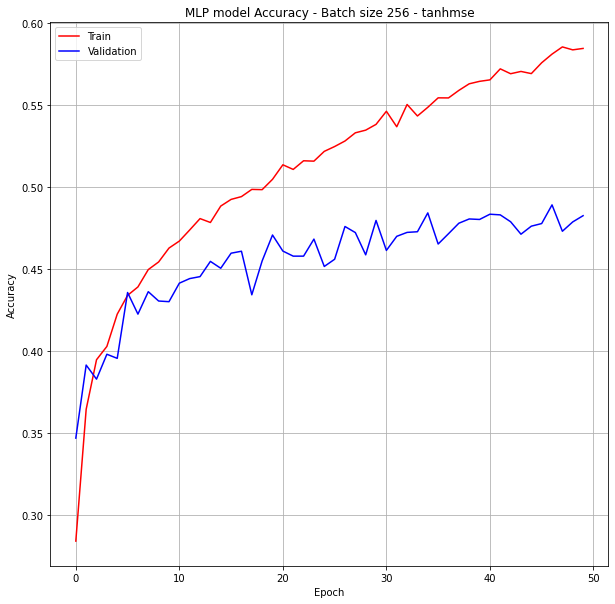


Plot the Loss Curves


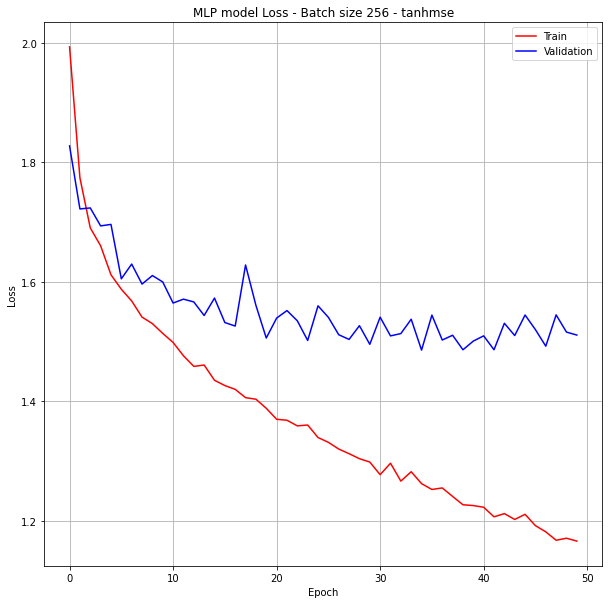


Test the model:
313/313 [==============================] - 1s 2ms/step - loss: 1.4927 - accuracy: 0.4826
Test Loss: 1.492709755897522 , Test Accuracy: 0.48260000348091125

Plot Confusion Matrix:


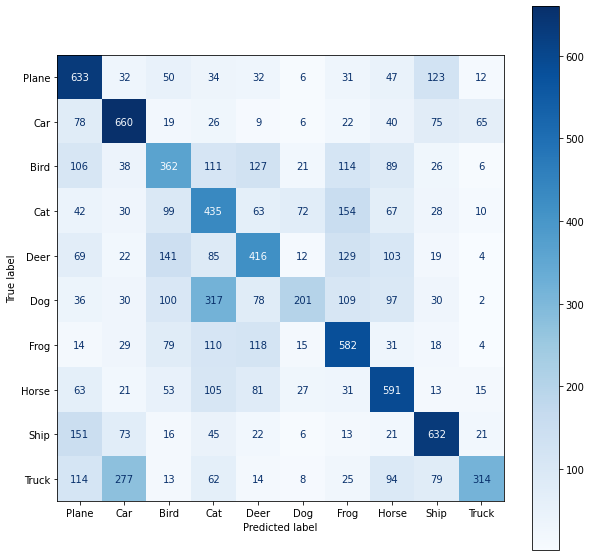

Job is done. learning time: 127 seconds


In [7]:
# Import TF and other requirements
print("Importing libraries.")
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import datasets, layers, models, Sequential, optimizers
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Import General libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import os

# Read Data
from six.moves import cPickle as pickle
import ssl
from keras.datasets import cifar10
import seaborn as sns

# Draw Flow chart
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

print("Libraries imported.\n")
# Creating directories if not exist.
from pathlib import Path
Path("figs").mkdir(parents=True, exist_ok=True)
Path("models").mkdir(parents=True, exist_ok=True)

# Defines:
question_part = "Q1PCplus"
model_type = "MLP"

# Hyper-Parameters
num_training=49000
num_validation=1000
num_test=10000
# database path
data_path = 'cifar10'
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_count = len(classes)
# Optimizer type: sgd, adam
opt_type = 'adam'
# Batch Size:
bs = 256
# Activation Function:
act_func = 'tanh'
# Epoch count:
ep_count = 50
# Loss metric:
loss_metric = 'categorical_crossentropy'

def model_plotter(model_history, metric, model_name, b_s, a_f):
    plt.figure()
    plt.plot(model_history.history[metric.lower()],'r')
    plt.plot(model_history.history['val_'+metric.lower()],'b')
    plt.title(model_name + ' model ' + metric.capitalize() + " - Batch size " + str(b_s) + " - " + a_f)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.savefig("figs/" + question_part + "_" + model_name + "_" + metric.lower() + "_" + str(b_s) + "_" + a_f + ".png")
    plt.show()

def read_data(path='cifar10'):
    xs = []
    ys = []
    for b in range(1,6):
        # load single batch of cifar
        filename = os.path.join(path, 'data_batch_%d' % (b, ))
        with open(filename, 'rb') as f:
            datadict = pickle.load(f, encoding='latin1')
            X = datadict['data'].reshape(10000, 3072)
            Y = np.array(datadict['labels'])
        xs.append(X)
        ys.append(Y)

    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    with open(os.path.join(path, 'test_batch'), 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        Xte = datadict['data'].reshape(10000, 3072)
        Yte = np.array(datadict['labels'])
    
    # Subsample the data
    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)
    x_val = Xtr[r_val].astype('float32')/255.0
    y_val = Ytr[r_val]

    # We can split data here, but we don't want.
    # x_train = Xtr[r_tr].astype('float32')/255.0
    # y_train = Ytr[r_tr]
    x_train = Xtr.astype('float32')/255.0
    y_train = Ytr

    x_test = Xte[r_te].astype('float32')/255.0
    y_test = Yte[r_te]
    return x_train, y_train, x_val, y_val, x_test, y_test

print("Reading data started.")
read_data_online = True
if read_data_online:
    # Read data, using Keras (Needs download):
    ssl._create_default_https_context = ssl._create_unverified_context
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)

    x_val = x_train[r_val].astype('float32')/255.0
    y_val = y_train[r_val]
    # x_train = x_train[r_tr].astype('float32')/255.0
    x_train = x_train.astype('float32')/255.0
    # y_train = y_train[r_tr]
    x_test = x_test[r_te].astype('float32')/255.0
    y_test = y_test[r_te]
    xtr_img = x_train
    xte_img = x_test
else:
    # Read data, using the defined function (locally - Downloaded file):
    x_train, y_train, x_val, y_val, x_test, y_test = read_data(data_path)
    xtr_img = x_train.reshape(len(x_train), 3, 32, 32).transpose([0, 2, 3, 1])
    xte_img = x_test.reshape(len(x_test), 3, 32, 32).transpose([0, 2, 3, 1])

# Making classes one hot for the sake of model training:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, class_count)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, class_count)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, class_count)

print("Reading data finished.\n")

print("Creating the model.")
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (3072)))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC1_h_128_' + act_func))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC2_h_128_' + act_func))
model.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'FC3_o_10_Softmax'))
if opt_type=='adam':
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0009)
else:
    # opt_type=='sgd'
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, name=opt_type.upper())
model.compile(optimizer = opt, loss = loss_metric, metrics = ['accuracy'])
model.summary()

print("Model created.\n")

print("Learn the model, Batch size =", bs)
t = time.time()
model_learning = model.fit(x_train.reshape(len(x_train),-1), y_train_one_hot, epochs = ep_count, batch_size=bs, validation_split=0.2, shuffle=True)
t = time.time()-t

print("\nPlot the Accuracy Curves")
model_plotter(model_learning, 'accuracy', model_type, bs, act_func+"mse")

print("\nPlot the Loss Curves")
model_plotter(model_learning, 'loss', model_type, bs, act_func+"mse")

model.save("models/cifar10_" + question_part + "_" + model_type + "_bs" + str(bs) + "_" + act_func + "_mse.h5")

# Model Testing:
print("\nTest the model:")
model_test_result = model.evaluate(x_test.reshape(len(x_test),-1), y_test_one_hot)
print("Test Loss:", model_test_result[0], ", Test Accuracy:", model_test_result[1])

print("\nPlot Confusion Matrix:")
# Confusion Matrix:
y_pred_softmax = model.predict(x_test.reshape(len(x_test),-1))
y_pred = [np.argmax(y) for y in y_pred_softmax]

cm = confusion_matrix(y_test, y_pred)
plt.rcParams["figure.figsize"] = (10,10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("figs/" + question_part + "_" + model_type + "_confusion_" + str(bs) + "_" + act_func +  "_mse.png")
plt.show()

print("Job is done. learning time:", int(t), "seconds")

# MLP - PART D: Best model with RECALL, Precision, F-Score:<a class="anchor" id="MLPD"></a>

Importing libraries.
TensorFlow version: 2.7.0
Libraries imported.

Reading data started.
Reading data finished.

Creating the model.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FC1_h_128_tanh (Dense)      (None, 128)               393344    
                                                                 
 FC2_h_128_tanh (Dense)      (None, 128)               16512     
                                                                 
 FC3_o_10_Softmax (Dense)    (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________
Model created.

Learn the model, Batch size = 256
Epoch 1/50
157/157 [==============================] - 3s 17ms/step - loss: 1.9066 - accuracy: 0.3164 - val_loss: 1.7863 - val_ac

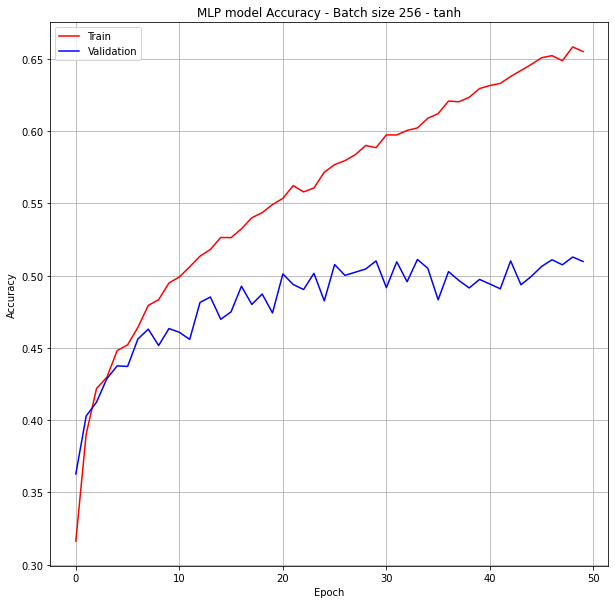


Plot the Loss Curves


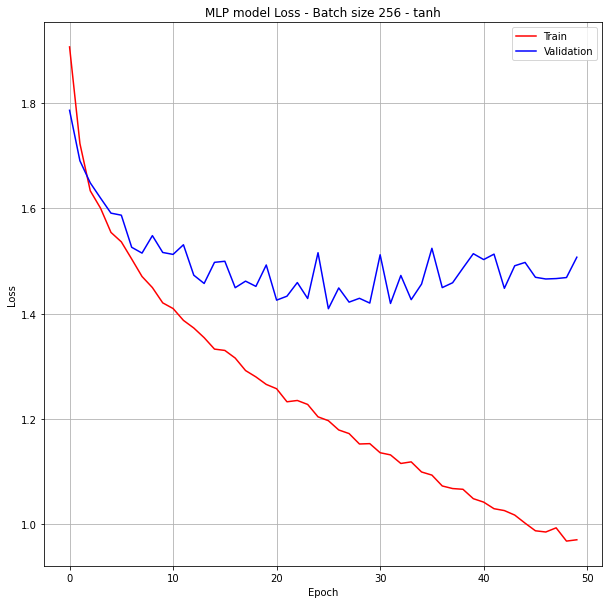


Test the model:
313/313 [==============================] - 1s 2ms/step - loss: 1.4934 - accuracy: 0.5039
Test Loss: 1.4934054613113403 , Test Accuracy: 0.5038999915122986

Plot Confusion Matrix:
              precision    recall  f1-score   support

           0       0.62      0.54      0.57      1000
           1       0.67      0.60      0.63      1000
           2       0.42      0.44      0.43      1000
           3       0.31      0.36      0.33      1000
           4       0.56      0.29      0.39      1000
           5       0.37      0.45      0.41      1000
           6       0.54      0.60      0.57      1000
           7       0.49      0.67      0.56      1000
           8       0.57      0.71      0.63      1000
           9       0.67      0.38      0.49      1000

    accuracy                           0.50     10000
   macro avg       0.52      0.50      0.50     10000
weighted avg       0.52      0.50      0.50     10000



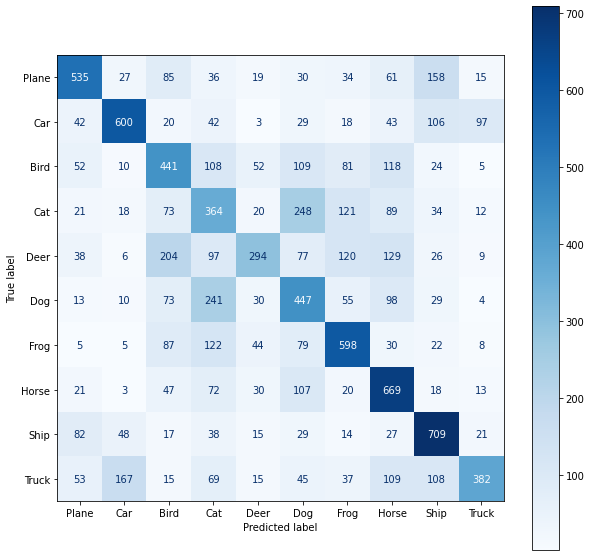

Job is done. learning time: 125 seconds


In [8]:
# Import TF and other requirements
print("Importing libraries.")
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import datasets, layers, models, Sequential, optimizers
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Import General libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import os

# Read Data
from six.moves import cPickle as pickle
import ssl
from keras.datasets import cifar10
import seaborn as sns

# Draw Flow chart
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

print("Libraries imported.\n")
# Creating directories if not exist.
from pathlib import Path
Path("figs").mkdir(parents=True, exist_ok=True)
Path("models").mkdir(parents=True, exist_ok=True)

# Defines:
question_part = "Q1PD"
model_type = "MLP"

# Hyper-Parameters
num_training=49000
num_validation=1000
num_test=10000
# database path
data_path = 'cifar10'
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_count = len(classes)
# Optimizer type: sgd, adam
opt_type = 'sgd'
# Batch Size:
bs = 256
# Activation Function:
act_func = 'tanh'
# Epoch count:
ep_count = 50
# Loss metric:
loss_metric = 'categorical_crossentropy'

def model_plotter(model_history, metric, model_name, b_s, a_f):
    plt.figure()
    plt.plot(model_history.history[metric.lower()],'r')
    plt.plot(model_history.history['val_'+metric.lower()],'b')
    plt.title(model_name + ' model ' + metric.capitalize() + " - Batch size " + str(b_s) + " - " + a_f)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.savefig("figs/" + question_part + "_" + model_name + "_" + metric.lower() + "_" + str(b_s) + "_" + a_f + ".png")
    plt.show()

def read_data(path='cifar10'):
    xs = []
    ys = []
    for b in range(1,6):
        # load single batch of cifar
        filename = os.path.join(path, 'data_batch_%d' % (b, ))
        with open(filename, 'rb') as f:
            datadict = pickle.load(f, encoding='latin1')
            X = datadict['data'].reshape(10000, 3072)
            Y = np.array(datadict['labels'])
        xs.append(X)
        ys.append(Y)

    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    with open(os.path.join(path, 'test_batch'), 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        Xte = datadict['data'].reshape(10000, 3072)
        Yte = np.array(datadict['labels'])
    
    # Subsample the data
    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)
    x_val = Xtr[r_val].astype('float32')/255.0
    y_val = Ytr[r_val]

    # We can split data here, but we don't want.
    # x_train = Xtr[r_tr].astype('float32')/255.0
    # y_train = Ytr[r_tr]
    x_train = Xtr.astype('float32')/255.0
    y_train = Ytr

    x_test = Xte[r_te].astype('float32')/255.0
    y_test = Yte[r_te]
    return x_train, y_train, x_val, y_val, x_test, y_test

print("Reading data started.")
read_data_online = True
if read_data_online:
    # Read data, using Keras (Needs download):
    ssl._create_default_https_context = ssl._create_unverified_context
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)

    x_val = x_train[r_val].astype('float32')/255.0
    y_val = y_train[r_val]
    # x_train = x_train[r_tr].astype('float32')/255.0
    x_train = x_train.astype('float32')/255.0
    # y_train = y_train[r_tr]
    x_test = x_test[r_te].astype('float32')/255.0
    y_test = y_test[r_te]
    xtr_img = x_train
    xte_img = x_test
else:
    # Read data, using the defined function (locally - Downloaded file):
    x_train, y_train, x_val, y_val, x_test, y_test = read_data(data_path)
    xtr_img = x_train.reshape(len(x_train), 3, 32, 32).transpose([0, 2, 3, 1])
    xte_img = x_test.reshape(len(x_test), 3, 32, 32).transpose([0, 2, 3, 1])

# Making classes one hot for the sake of model training:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, class_count)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, class_count)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, class_count)

print("Reading data finished.\n")

print("Creating the model.")
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (3072)))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC1_h_128_' + act_func))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC2_h_128_' + act_func))
model.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'FC3_o_10_Softmax'))
if opt_type=='adam':
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0009)
else:
    # opt_type=='sgd'
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, name=opt_type.upper())
model.compile(optimizer = opt, loss = loss_metric, metrics = ['accuracy'])
model.summary()

print("Model created.\n")

print("Learn the model, Batch size =", bs)
t = time.time()
model_learning = model.fit(x_train.reshape(len(x_train),-1), y_train_one_hot, epochs = ep_count, batch_size=bs, validation_split=0.2, shuffle=True)
t = time.time()-t

print("\nPlot the Accuracy Curves")
model_plotter(model_learning, 'accuracy', model_type, bs, act_func)

print("\nPlot the Loss Curves")
model_plotter(model_learning, 'loss', model_type, bs, act_func)

model.save("models/cifar10_" + question_part + "_" + model_type + "_bs" + str(bs) + "_" + act_func + ".h5")

# Model Testing:
print("\nTest the model:")
model_test_result = model.evaluate(x_test.reshape(len(x_test),-1), y_test_one_hot)
print("Test Loss:", model_test_result[0], ", Test Accuracy:", model_test_result[1])

print("\nPlot Confusion Matrix:")
# Confusion Matrix:
y_pred_softmax = model.predict(x_test.reshape(len(x_test),-1))
y_pred = [np.argmax(y) for y in y_pred_softmax]

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams["figure.figsize"] = (10,10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("figs/" + question_part + "_" + model_type + "_confusion_" + str(bs) + "_" + act_func +  ".png")
plt.show()

print("Job is done. learning time:", int(t), "seconds")

# MLP - PART E & F: Imbalanced Dataset:<a class="anchor" id="MLPEF"></a>

Make dataset imbalanced.

Importing libraries.
TensorFlow version: 2.7.0
Libraries imported.

Reading data started.
Reading data finished.

Remove some random samples from Plane and Bird.
Samples have been removed.


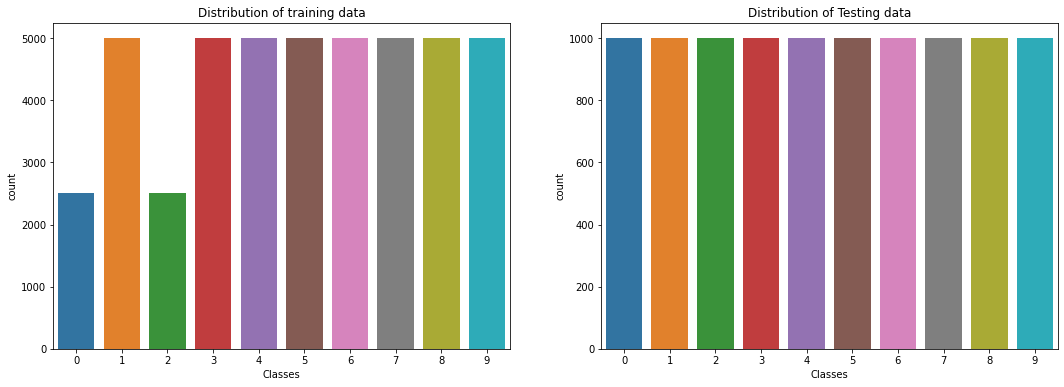

Creating the model.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FC1_h_128_tanh (Dense)      (None, 128)               393344    
                                                                 
 FC2_h_128_tanh (Dense)      (None, 128)               16512     
                                                                 
 FC3_o_10_Softmax (Dense)    (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________
Model created.

Learn the model, Batch size = 256
Epoch 1/50
141/141 [==============================] - 3s 17ms/step - loss: 1.9011 - accuracy: 0.3230 - val_loss: 1.7808 - val_accuracy: 0.3704
Epoch 2/50
141/141 [==============================] - 2s 16ms/step - loss: 1.7125 - accuracy: 0.398

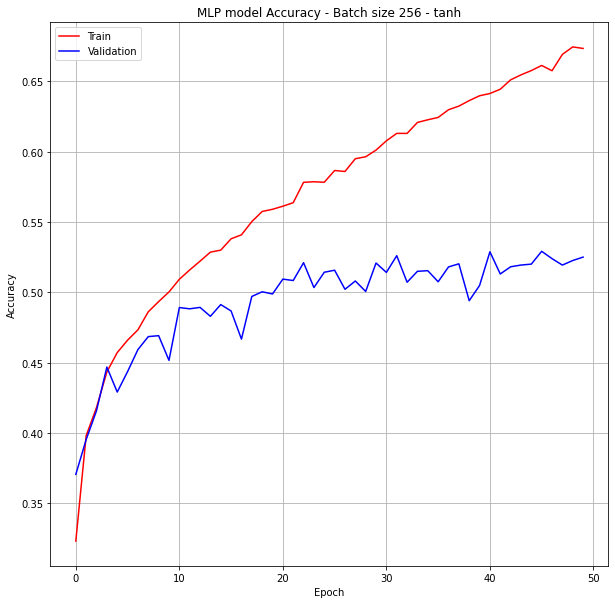


Plot the Loss Curves


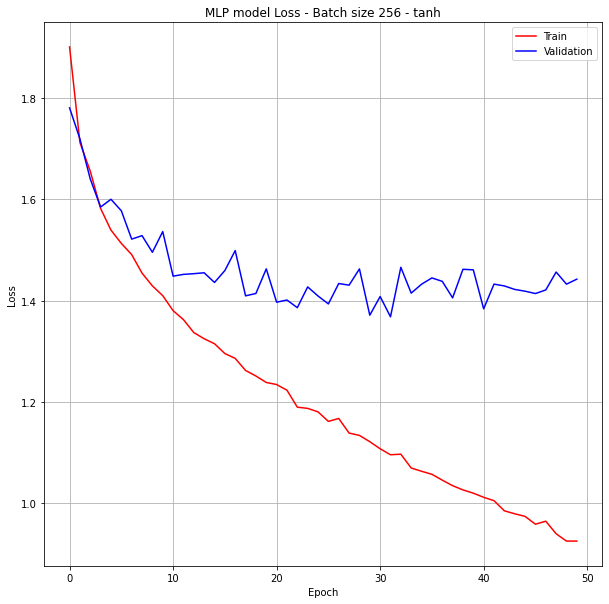


Test the model:
313/313 [==============================] - 1s 2ms/step - loss: 1.5031 - accuracy: 0.4981
Test Loss: 1.5030699968338013 , Test Accuracy: 0.49810001254081726

Plot Confusion Matrix:
              precision    recall  f1-score   support

           0       0.72      0.35      0.47      1000
           1       0.52      0.67      0.59      1000
           2       0.50      0.20      0.29      1000
           3       0.35      0.36      0.35      1000
           4       0.48      0.44      0.46      1000
           5       0.42      0.39      0.40      1000
           6       0.52      0.64      0.57      1000
           7       0.46      0.66      0.54      1000
           8       0.57      0.69      0.62      1000
           9       0.54      0.58      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.49     10000
weighted avg       0.51      0.50      0.49     10000



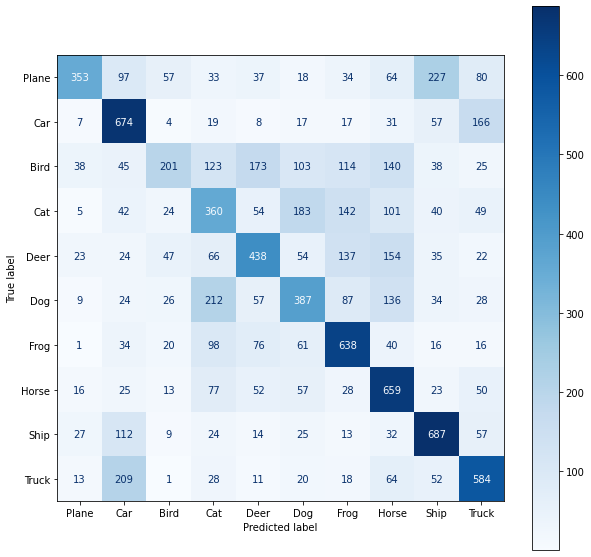

Job is done. learning time: 111 seconds


In [9]:
# Import TF and other requirements
print("Importing libraries.")
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import datasets, layers, models, Sequential, optimizers
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Import General libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import os

# Read Data
from six.moves import cPickle as pickle
import ssl
from keras.datasets import cifar10
import seaborn as sns

# Draw Flow chart
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

print("Libraries imported.\n")
# Creating directories if not exist.
from pathlib import Path
Path("figs").mkdir(parents=True, exist_ok=True)
Path("models").mkdir(parents=True, exist_ok=True)

# Defines:
question_part = "Q1PE"
model_type = "MLP"

# Hyper-Parameters
num_training=49000
num_validation=1000
num_test=10000
# database path
data_path = 'cifar10'
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_count = len(classes)
# Optimizer type: sgd, adam
opt_type = 'sgd'
# Batch Size:
bs = 256
# Activation Function:
act_func = 'tanh'
# Epoch count:
ep_count = 50
# Loss metric:
loss_metric = 'categorical_crossentropy'

def model_plotter(model_history, metric, model_name, b_s, a_f):
    plt.figure()
    plt.plot(model_history.history[metric.lower()],'r')
    plt.plot(model_history.history['val_'+metric.lower()],'b')
    plt.title(model_name + ' model ' + metric.capitalize() + " - Batch size " + str(b_s) + " - " + a_f)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.savefig("figs/" + question_part + "_" + model_name + "_" + metric.lower() + "_" + str(b_s) + "_" + a_f + ".png")
    plt.show()

def read_data(path='cifar10'):
    xs = []
    ys = []
    for b in range(1,6):
        # load single batch of cifar
        filename = os.path.join(path, 'data_batch_%d' % (b, ))
        with open(filename, 'rb') as f:
            datadict = pickle.load(f, encoding='latin1')
            X = datadict['data'].reshape(10000, 3072)
            Y = np.array(datadict['labels'])
        xs.append(X)
        ys.append(Y)

    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    with open(os.path.join(path, 'test_batch'), 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        Xte = datadict['data'].reshape(10000, 3072)
        Yte = np.array(datadict['labels'])
    
    # Subsample the data
    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)
    x_val = Xtr[r_val].astype('float32')/255.0
    y_val = Ytr[r_val]

    # We can split data here, but we don't want.
    # x_train = Xtr[r_tr].astype('float32')/255.0
    # y_train = Ytr[r_tr]
    x_train = Xtr.astype('float32')/255.0
    y_train = Ytr

    x_test = Xte[r_te].astype('float32')/255.0
    y_test = Yte[r_te]
    return x_train, y_train, x_val, y_val, x_test, y_test

print("Reading data started.")
read_data_online = True
if read_data_online:
    # Read data, using Keras (Needs download):
    ssl._create_default_https_context = ssl._create_unverified_context
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)

    x_val = x_train[r_val].astype('float32')/255.0
    y_val = y_train[r_val]
    # x_train = x_train[r_tr].astype('float32')/255.0
    x_train = x_train.astype('float32')/255.0
    # y_train = y_train[r_tr]
    x_test = x_test[r_te].astype('float32')/255.0
    y_test = y_test[r_te]
    xtr_img = x_train
    xte_img = x_test
else:
    # Read data, using the defined function (locally - Downloaded file):
    x_train, y_train, x_val, y_val, x_test, y_test = read_data(data_path)
    xtr_img = x_train.reshape(len(x_train), 3, 32, 32).transpose([0, 2, 3, 1])
    xte_img = x_test.reshape(len(x_test), 3, 32, 32).transpose([0, 2, 3, 1])

# Making classes one hot for the sake of model training:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, class_count)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, class_count)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, class_count)

print("Reading data finished.\n")

print("Remove some random samples from Plane and Bird.")
index = []
index.append(np.where(y_train == 0))
index.append(np.where(y_train == 2))
# print(len(index[0][0]), len(index[1][0]))

remove_index = []
remove_index.append(random.sample(index[0][0].tolist(), int(len(index[0][0])/2)))
remove_index.append(random.sample(index[1][0].tolist(), int(len(index[1][0])/2)))
remove_index.append(remove_index[0] + remove_index[1])
# print(len(remove_index[0]), len(remove_index[1]), len(remove_index[2]))

y_train = np.delete(y_train, remove_index[2], axis=0)
x_train = np.delete(x_train, remove_index[2], axis=0)
xtr_img = np.delete(xtr_img, remove_index[2], axis=0)
y_train_one_hot = np.delete(y_train_one_hot, remove_index[2], axis=0)
print("Samples have been removed.")

figure, axis = plt.subplots( 1, 2 , figsize = (18,6))
sns.countplot(x=y_train.ravel(), ax = axis[0])
axis[0].set_title('Distribution of training data')
axis[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(x=y_test.ravel(), ax=axis[1])
axis[1].set_title('Distribution of Testing data')
axis[1].set_xlabel('Classes')
plt.savefig("figs/imbalanced_dist.png")
plt.show()

print("Creating the model.")
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (3072)))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC1_h_128_' + act_func))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC2_h_128_' + act_func))
model.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'FC3_o_10_Softmax'))
if opt_type=='adam':
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0009)
else:
    # opt_type=='sgd'
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, name=opt_type.upper())
model.compile(optimizer = opt, loss = loss_metric, metrics = ['accuracy'])
model.summary()

print("Model created.\n")

print("Learn the model, Batch size =", bs)
t = time.time()
model_learning = model.fit(x_train.reshape(len(x_train),-1), y_train_one_hot, epochs = ep_count, batch_size=bs, validation_split=0.2, shuffle=True)
t = time.time()-t

print("\nPlot the Accuracy Curves")
model_plotter(model_learning, 'accuracy', model_type, bs, act_func)

print("\nPlot the Loss Curves")
model_plotter(model_learning, 'loss', model_type, bs, act_func)

model.save("models/cifar10_" + question_part + "_" + model_type + "_bs" + str(bs) + "_" + act_func + ".h5")

# Model Testing:
print("\nTest the model:")
model_test_result = model.evaluate(x_test.reshape(len(x_test),-1), y_test_one_hot)
print("Test Loss:", model_test_result[0], ", Test Accuracy:", model_test_result[1])

print("\nPlot Confusion Matrix:")
# Confusion Matrix:
y_pred_softmax = model.predict(x_test.reshape(len(x_test),-1))
y_pred = [np.argmax(y) for y in y_pred_softmax]

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams["figure.figsize"] = (10,10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("figs/" + question_part + "_" + model_type + "_confusion_" + str(bs) + "_" + act_func +  ".png")
plt.show()

print("Job is done. learning time:", int(t), "seconds")

Augmentation:

Importing libraries.
TensorFlow version: 2.7.0
Libraries imported.

Reading data started.
Reading data finished.

Remove some random samples from Plane and Bird.
Samples have been removed.

Add pictures fliped mode to the dataset.
Flipping augmentation.

Pictures added.


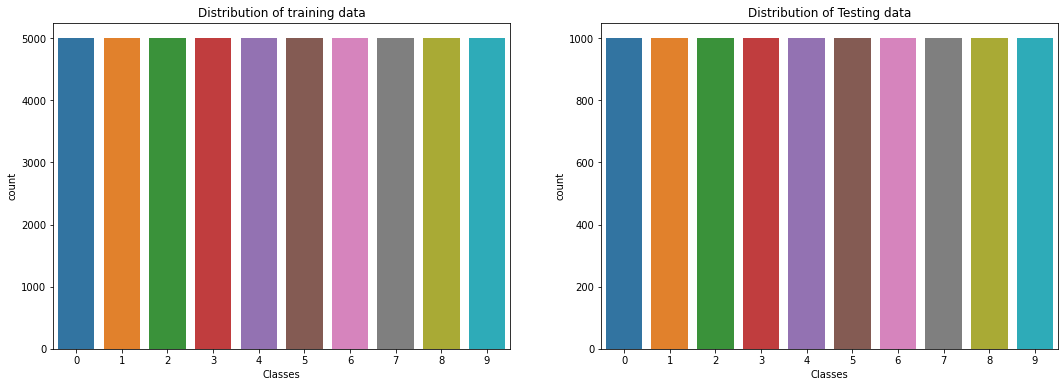

Creating the model.
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FC1_h_128_tanh (Dense)      (None, 128)               393344    
                                                                 
 FC2_h_128_tanh (Dense)      (None, 128)               16512     
                                                                 
 FC3_o_10_Softmax (Dense)    (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________
Model created.

Learn the model, Batch size = 256
Epoch 1/50
157/157 [==============================] - 3s 17ms/step - loss: 1.9022 - accuracy: 0.3196 - val_loss: 1.7586 - val_accuracy: 0.3758
Epoch 2/50
157/157 [==============================] - 2s 16ms/step - loss: 1.7348 - accuracy: 0.384

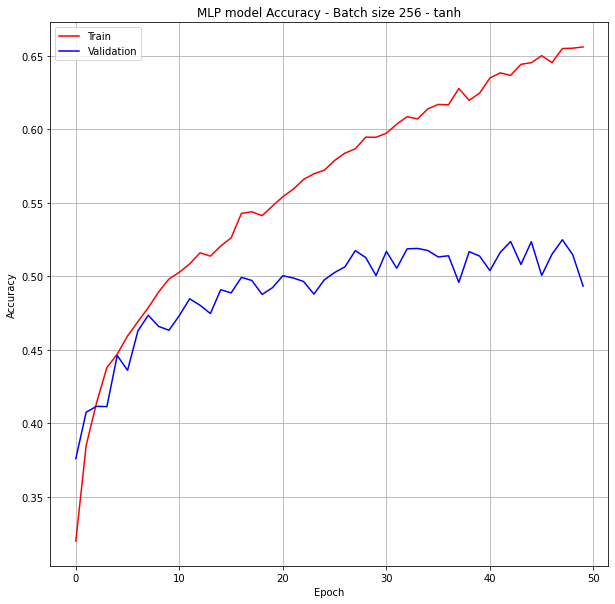


Plot the Loss Curves


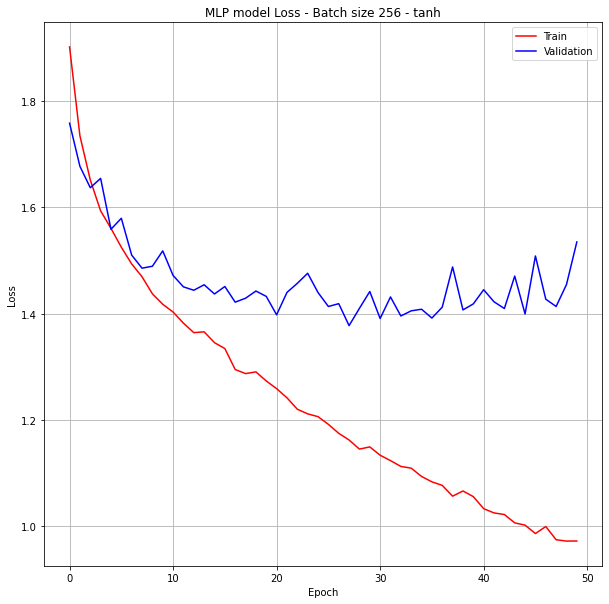


Test the model:
313/313 [==============================] - 1s 2ms/step - loss: 1.5422 - accuracy: 0.4883
Test Loss: 1.5421818494796753 , Test Accuracy: 0.48829999566078186

Plot Confusion Matrix:
              precision    recall  f1-score   support

           0       0.72      0.41      0.52      1000
           1       0.64      0.59      0.61      1000
           2       0.49      0.21      0.29      1000
           3       0.32      0.42      0.36      1000
           4       0.59      0.24      0.34      1000
           5       0.35      0.44      0.39      1000
           6       0.41      0.75      0.53      1000
           7       0.70      0.46      0.55      1000
           8       0.59      0.68      0.63      1000
           9       0.47      0.68      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.53      0.49      0.48     10000
weighted avg       0.53      0.49      0.48     10000



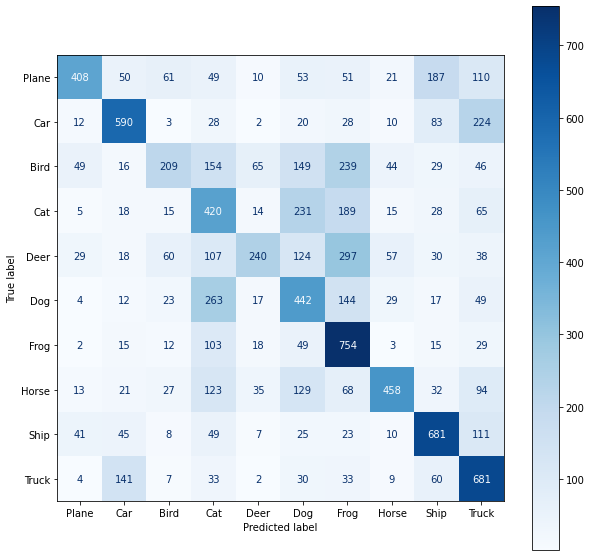

Job is done. learning time: 142 seconds


In [10]:
# Import TF and other requirements
print("Importing libraries.")
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import datasets, layers, models, Sequential, optimizers
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Import General libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import os

# Read Data
from six.moves import cPickle as pickle
import ssl
from keras.datasets import cifar10
import seaborn as sns

# Draw Flow chart
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model
from keras.preprocessing.image import ImageDataGenerator

print("Libraries imported.\n")
# Creating directories if not exist.
from pathlib import Path
Path("figs").mkdir(parents=True, exist_ok=True)
Path("models").mkdir(parents=True, exist_ok=True)

# Defines:
question_part = "Q1PF"
model_type = "MLP"

# Hyper-Parameters
num_training=49000
num_validation=1000
num_test=10000
# database path
data_path = 'cifar10'
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_count = len(classes)
# Optimizer type: sgd, adam
opt_type = 'sgd'
# Batch Size:
bs = 256
# Activation Function:
act_func = 'tanh'
# Epoch count:
ep_count = 50
# Loss metric:
loss_metric = 'categorical_crossentropy'

def model_plotter(model_history, metric, model_name, b_s, a_f):
    plt.figure()
    plt.plot(model_history.history[metric.lower()],'r')
    plt.plot(model_history.history['val_'+metric.lower()],'b')
    plt.title(model_name + ' model ' + metric.capitalize() + " - Batch size " + str(b_s) + " - " + a_f)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.savefig("figs/" + question_part + "_" + model_name + "_" + metric.lower() + "_" + str(b_s) + "_" + a_f + ".png")
    plt.show()

def read_data(path='cifar10'):
    xs = []
    ys = []
    for b in range(1,6):
        # load single batch of cifar
        filename = os.path.join(path, 'data_batch_%d' % (b, ))
        with open(filename, 'rb') as f:
            datadict = pickle.load(f, encoding='latin1')
            X = datadict['data'].reshape(10000, 3072)
            Y = np.array(datadict['labels'])
        xs.append(X)
        ys.append(Y)

    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    with open(os.path.join(path, 'test_batch'), 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        Xte = datadict['data'].reshape(10000, 3072)
        Yte = np.array(datadict['labels'])
    
    # Subsample the data
    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)
    x_val = Xtr[r_val].astype('float32')/255.0
    y_val = Ytr[r_val]

    # We can split data here, but we don't want.
    # x_train = Xtr[r_tr].astype('float32')/255.0
    # y_train = Ytr[r_tr]
    x_train = Xtr.astype('float32')/255.0
    y_train = Ytr

    x_test = Xte[r_te].astype('float32')/255.0
    y_test = Yte[r_te]
    return x_train, y_train, x_val, y_val, x_test, y_test

print("Reading data started.")
read_data_online = True
if read_data_online:
    # Read data, using Keras (Needs download):
    ssl._create_default_https_context = ssl._create_unverified_context
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)

    x_val = x_train[r_val].astype('float32')/255.0
    y_val = y_train[r_val]
    # x_train = x_train[r_tr].astype('float32')/255.0
    x_train = x_train.astype('float32')/255.0
    # y_train = y_train[r_tr]
    x_test = x_test[r_te].astype('float32')/255.0
    y_test = y_test[r_te]
    xtr_img = x_train
    xte_img = x_test
else:
    # Read data, using the defined function (locally - Downloaded file):
    x_train, y_train, x_val, y_val, x_test, y_test = read_data(data_path)
    xtr_img = x_train.reshape(len(x_train), 3, 32, 32).transpose([0, 2, 3, 1])
    xte_img = x_test.reshape(len(x_test), 3, 32, 32).transpose([0, 2, 3, 1])

# Making classes one hot for the sake of model training:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, class_count)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, class_count)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, class_count)

print("Reading data finished.\n")

print("Remove some random samples from Plane and Bird.")
index = []
index.append(np.where(y_train == 0))
index.append(np.where(y_train == 2))
# print(len(index[0][0]), len(index[1][0]))

remove_index = []
remove_index.append(random.sample(index[0][0].tolist(), int(len(index[0][0])/2)))
remove_index.append(random.sample(index[1][0].tolist(), int(len(index[1][0])/2)))
remove_index.append(remove_index[0] + remove_index[1])
# print(len(remove_index[0]), len(remove_index[1]), len(remove_index[2]))

y_train = np.delete(y_train, remove_index[2], axis=0)
x_train = np.delete(x_train, remove_index[2], axis=0)
xtr_img = np.delete(xtr_img, remove_index[2], axis=0)
y_train_one_hot = np.delete(y_train_one_hot, remove_index[2], axis=0)
print("Samples have been removed.")

print("\nAdd pictures fliped mode to the dataset.")
remained_index = []
remained_index.append(np.where(y_train == 0)[0].tolist())
remained_index.append(np.where(y_train == 2)[0].tolist())
remained_index.append(remained_index[0] + remained_index[1])

print("Flipping augmentation.")
x_flipped = []
x_flipped.append(tf.image.flip_left_right(xtr_img[remained_index[0]]))
x_flipped.append(tf.image.flip_left_right(xtr_img[remained_index[1]]))

# datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1,)
flipped_y = np.array([[0]]*len(x_flipped[0])+[[2]]*len(x_flipped[1]))
flipped_y_one_hot = tf.keras.utils.to_categorical(flipped_y, class_count)

x_train = np.append(x_train, x_flipped[0], axis=0)
x_train = np.append(x_train, x_flipped[1], axis=0)
y_train = np.append(y_train, flipped_y, axis=0)
y_train_one_hot = np.append(y_train_one_hot, flipped_y_one_hot, axis=0)
print("\nPictures added.")

figure, axis = plt.subplots( 1, 2 , figsize = (18,6))
sns.countplot(x=y_train.ravel(), ax = axis[0])
axis[0].set_title('Distribution of training data')
axis[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(x=y_test.ravel(), ax=axis[1])
axis[1].set_title('Distribution of Testing data')
axis[1].set_xlabel('Classes')
plt.savefig("figs/imbalanced_dist.png")
plt.show()

print("Creating the model.")
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (3072)))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC1_h_128_' + act_func))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC2_h_128_' + act_func))
model.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'FC3_o_10_Softmax'))
if opt_type=='adam':
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0009)
else:
    # opt_type=='sgd'
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, name=opt_type.upper())
model.compile(optimizer = opt, loss = loss_metric, metrics = ['accuracy'])
model.summary()

print("Model created.\n")

print("Learn the model, Batch size =", bs)

# Shuffle data
from random import shuffle
idx = list(range(0, len(x_train)))
shuffle(idx)
x_train = x_train[idx]
y_train = y_train[idx]
y_train_one_hot = y_train_one_hot[idx]

t = time.time()
model_learning = model.fit(x_train.reshape(len(x_train),-1), y_train_one_hot, epochs = ep_count, batch_size=bs, validation_split=0.2, shuffle=True)
t = time.time()-t

print("\nPlot the Accuracy Curves")
model_plotter(model_learning, 'accuracy', model_type, bs, act_func)

print("\nPlot the Loss Curves")
model_plotter(model_learning, 'loss', model_type, bs, act_func)

model.save("models/cifar10_" + question_part + "_" + model_type + "_bs" + str(bs) + "_" + act_func + ".h5")

# Model Testing:
print("\nTest the model:")
model_test_result = model.evaluate(x_test.reshape(len(x_test),-1), y_test_one_hot)
print("Test Loss:", model_test_result[0], ", Test Accuracy:", model_test_result[1])

print("\nPlot Confusion Matrix:")
# Confusion Matrix:
y_pred_softmax = model.predict(x_test.reshape(len(x_test),-1))
y_pred = [np.argmax(y) for y in y_pred_softmax]

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams["figure.figsize"] = (10,10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("figs/" + question_part + "_" + model_type + "_confusion_" + str(bs) + "_" + act_func +  ".png")
plt.show()

print("Job is done. learning time:", int(t), "seconds")

# CNN - PART A:<a class="anchor" id="CNNA"></a>

Importing libraries.
TensorFlow version: 2.7.0
Libraries imported.

Reading data started.
170508288/170498071 [==============================] - 6s 0us/step
Reading data finished.

Creating the model.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 128)       73856     
                                                     

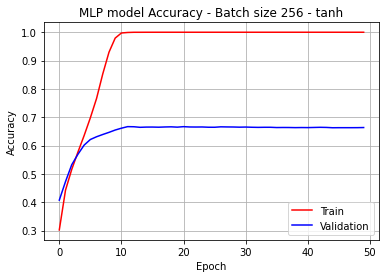


Plot the Loss Curves


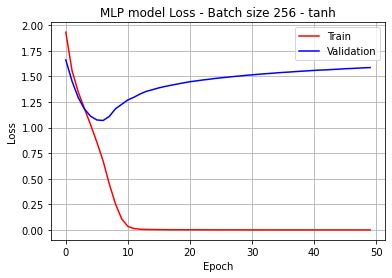


Test the model:
313/313 [==============================] - 4s 12ms/step - loss: 1.6667 - accuracy: 0.6513
Test Loss: 1.6667109727859497 , Test Accuracy: 0.6513000130653381

Plot Confusion Matrix:
              precision    recall  f1-score   support

           0       0.66      0.71      0.69      1000
           1       0.76      0.78      0.77      1000
           2       0.54      0.51      0.52      1000
           3       0.48      0.46      0.47      1000
           4       0.60      0.56      0.58      1000
           5       0.55      0.54      0.54      1000
           6       0.71      0.76      0.73      1000
           7       0.70      0.71      0.70      1000
           8       0.77      0.77      0.77      1000
           9       0.72      0.72      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



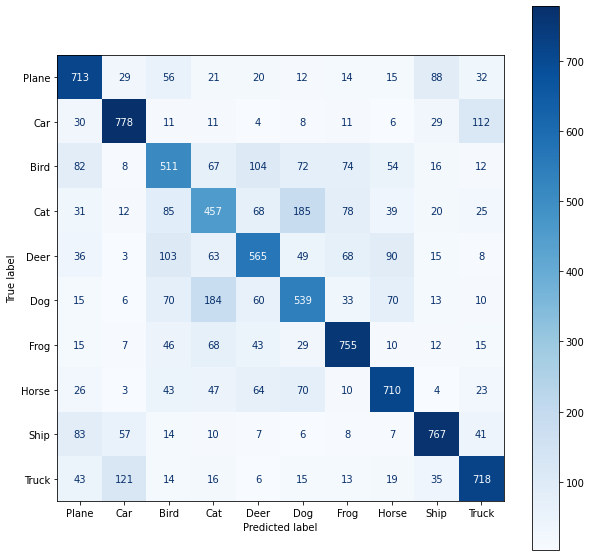

Job is done. learning time: 1765 seconds


In [1]:
# Import TF and other requirements
print("Importing libraries.")
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import datasets, layers, models, Sequential, optimizers
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Import General libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import os

# Read Data
from six.moves import cPickle as pickle
import ssl
from keras.datasets import cifar10
import seaborn as sns

# Draw Flow chart
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

print("Libraries imported.\n")
# Creating directories if not exist.
from pathlib import Path
Path("figs").mkdir(parents=True, exist_ok=True)
Path("models").mkdir(parents=True, exist_ok=True)

# Defines:
question_part = "Q1PCA"
model_type = "MLP"

# Hyper-Parameters
num_training=49000
num_validation=1000
num_test=10000
# database path
data_path = 'cifar10'
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_count = len(classes)
# Optimizer type: sgd, adam
opt_type = 'sgd'
# Batch Size:
bs = 256
# Activation Function:
act_func = 'tanh'
# Epoch count:
ep_count = 50
# Loss metric:
loss_metric = 'categorical_crossentropy'

def model_plotter(model_history, metric, model_name, b_s, a_f):
    plt.figure()
    plt.plot(model_history.history[metric.lower()],'r')
    plt.plot(model_history.history['val_'+metric.lower()],'b')
    plt.title(model_name + ' model ' + metric.capitalize() + " - Batch size " + str(b_s) + " - " + a_f)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.savefig("figs/" + question_part + "_" + model_name + "_" + metric.lower() + "_" + str(b_s) + "_" + a_f + ".png")
    plt.show()

def read_data(path='cifar10'):
    xs = []
    ys = []
    for b in range(1,6):
        # load single batch of cifar
        filename = os.path.join(path, 'data_batch_%d' % (b, ))
        with open(filename, 'rb') as f:
            datadict = pickle.load(f, encoding='latin1')
            X = datadict['data'].reshape(10000, 3072)
            Y = np.array(datadict['labels'])
        xs.append(X)
        ys.append(Y)

    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    with open(os.path.join(path, 'test_batch'), 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        Xte = datadict['data'].reshape(10000, 3072)
        Yte = np.array(datadict['labels'])
    
    # Subsample the data
    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)
    x_val = Xtr[r_val].astype('float32')/255.0
    y_val = Ytr[r_val]

    # We can split data here, but we don't want.
    # x_train = Xtr[r_tr].astype('float32')/255.0
    # y_train = Ytr[r_tr]
    x_train = Xtr.astype('float32')/255.0
    y_train = Ytr

    x_test = Xte[r_te].astype('float32')/255.0
    y_test = Yte[r_te]
    return x_train, y_train, x_val, y_val, x_test, y_test

print("Reading data started.")
read_data_online = True
if read_data_online:
    # Read data, using Keras (Needs download):
    ssl._create_default_https_context = ssl._create_unverified_context
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)

    x_val = x_train[r_val].astype('float32')/255.0
    y_val = y_train[r_val]
    # x_train = x_train[r_tr].astype('float32')/255.0
    x_train = x_train.astype('float32')/255.0
    # y_train = y_train[r_tr]
    x_test = x_test[r_te].astype('float32')/255.0
    y_test = y_test[r_te]
    xtr_img = x_train
    xte_img = x_test
else:
    # Read data, using the defined function (locally - Downloaded file):
    x_train, y_train, x_val, y_val, x_test, y_test = read_data(data_path)
    xtr_img = x_train.reshape(len(x_train), 3, 32, 32).transpose([0, 2, 3, 1])
    xte_img = x_test.reshape(len(x_test), 3, 32, 32).transpose([0, 2, 3, 1])

# Making classes one hot for the sake of model training:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, class_count)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, class_count)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, class_count)

print("Reading data finished.\n")

print("Creating the model.")
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC1_h_128_' + act_func))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC2_h_128_' + act_func))
model.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'FC3_o_10_Softmax'))
if opt_type=='adam':
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0009)
else:
    # opt_type=='sgd'
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, name=opt_type.upper())
METRICS = [
    'accuracy',
    # tf.keras.metrics.Precision(name='precision'),
    # tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer = opt, loss = loss_metric, metrics = METRICS)
model.summary()

print("Model created.\n")

print("Learn the model, Batch size =", bs)
t = time.time()
model_learning = model.fit(x_train, y_train_one_hot, epochs = ep_count, batch_size=bs, validation_split=0.2, shuffle=True)
t = time.time()-t

print("\nPlot the Accuracy Curves")
model_plotter(model_learning, 'accuracy', model_type, bs, act_func)

print("\nPlot the Loss Curves")
model_plotter(model_learning, 'loss', model_type, bs, act_func)

model.save("models/cifar10_" + question_part + "_" + model_type + "_bs" + str(bs) + "_" + act_func + ".h5")

# Model Testing:
print("\nTest the model:")
model_test_result = model.evaluate(x_test, y_test_one_hot)
print("Test Loss:", model_test_result[0], ", Test Accuracy:", model_test_result[1])

print("\nPlot Confusion Matrix:")
# Confusion Matrix:
y_pred_softmax = model.predict(x_test)
y_pred = [np.argmax(y) for y in y_pred_softmax]

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams["figure.figsize"] = (10,10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("figs/" + question_part + "_" + model_type + "_confusion_" + str(bs) + "_" + act_func +  ".png")
plt.show()

print("Job is done. learning time:", int(t), "seconds")

# CNN - PART B:<a class="anchor" id="CNNB"></a>

Importing libraries.
TensorFlow version: 2.7.0
Libraries imported.

Reading data started.
Reading data finished.

Creating the model.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)    

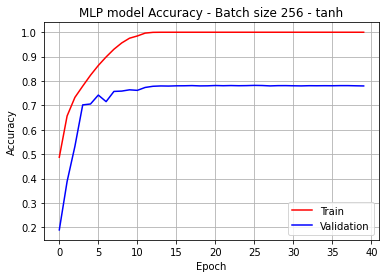


Plot the Loss Curves


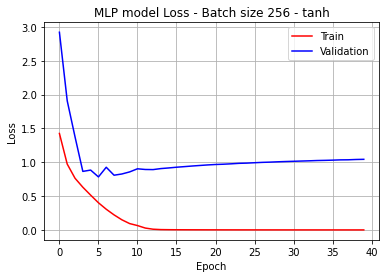


Test the model:
313/313 [==============================] - 3s 8ms/step - loss: 1.0594 - accuracy: 0.7763
Test Loss: 1.0593698024749756 , Test Accuracy: 0.7763000130653381

Plot Confusion Matrix:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1000
           1       0.88      0.88      0.88      1000
           2       0.68      0.66      0.67      1000
           3       0.62      0.60      0.61      1000
           4       0.73      0.75      0.74      1000
           5       0.68      0.68      0.68      1000
           6       0.83      0.85      0.84      1000
           7       0.82      0.82      0.82      1000
           8       0.86      0.88      0.87      1000
           9       0.84      0.86      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



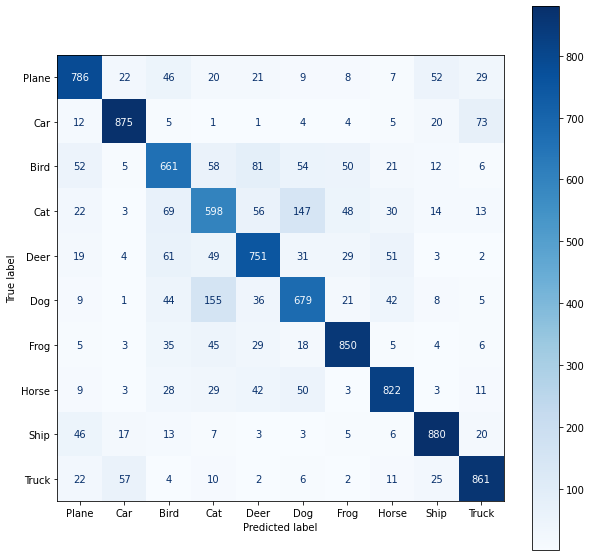

Job is done. learning time: 443 seconds


In [2]:
# Import TF and other requirements
print("Importing libraries.")
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import datasets, layers, models, Sequential, optimizers
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Import General libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import os

# Read Data
from six.moves import cPickle as pickle
import ssl
from keras.datasets import cifar10
import seaborn as sns

# Draw Flow chart
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

print("Libraries imported.\n")
# Creating directories if not exist.
from pathlib import Path
Path("figs").mkdir(parents=True, exist_ok=True)
Path("models").mkdir(parents=True, exist_ok=True)

# Defines:
question_part = "Q1PCB"
model_type = "MLP"

# Hyper-Parameters
num_training=49000
num_validation=1000
num_test=10000
# database path
data_path = 'cifar10'
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_count = len(classes)
# Optimizer type: sgd, adam
opt_type = 'sgd'
# Batch Size:
bs = 256
# Activation Function:
act_func = 'tanh'
# Epoch count:
ep_count = 40
# Loss metric:
loss_metric = 'categorical_crossentropy'

def model_plotter(model_history, metric, model_name, b_s, a_f):
    plt.figure()
    plt.plot(model_history.history[metric.lower()],'r')
    plt.plot(model_history.history['val_'+metric.lower()],'b')
    plt.title(model_name + ' model ' + metric.capitalize() + " - Batch size " + str(b_s) + " - " + a_f)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.savefig("figs/" + question_part + "_" + model_name + "_" + metric.lower() + "_" + str(b_s) + "_" + a_f + ".png")
    plt.show()

def read_data(path='cifar10'):
    xs = []
    ys = []
    for b in range(1,6):
        # load single batch of cifar
        filename = os.path.join(path, 'data_batch_%d' % (b, ))
        with open(filename, 'rb') as f:
            datadict = pickle.load(f, encoding='latin1')
            X = datadict['data'].reshape(10000, 3072)
            Y = np.array(datadict['labels'])
        xs.append(X)
        ys.append(Y)

    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    with open(os.path.join(path, 'test_batch'), 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        Xte = datadict['data'].reshape(10000, 3072)
        Yte = np.array(datadict['labels'])
    
    # Subsample the data
    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)
    x_val = Xtr[r_val].astype('float32')/255.0
    y_val = Ytr[r_val]

    # We can split data here, but we don't want.
    # x_train = Xtr[r_tr].astype('float32')/255.0
    # y_train = Ytr[r_tr]
    x_train = Xtr.astype('float32')/255.0
    y_train = Ytr

    x_test = Xte[r_te].astype('float32')/255.0
    y_test = Yte[r_te]
    return x_train, y_train, x_val, y_val, x_test, y_test

print("Reading data started.")
read_data_online = True
if read_data_online:
    # Read data, using Keras (Needs download):
    ssl._create_default_https_context = ssl._create_unverified_context
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)

    x_val = x_train[r_val].astype('float32')/255.0
    y_val = y_train[r_val]
    # x_train = x_train[r_tr].astype('float32')/255.0
    x_train = x_train.astype('float32')/255.0
    # y_train = y_train[r_tr]
    x_test = x_test[r_te].astype('float32')/255.0
    y_test = y_test[r_te]
    xtr_img = x_train
    xte_img = x_test
else:
    # Read data, using the defined function (locally - Downloaded file):
    x_train, y_train, x_val, y_val, x_test, y_test = read_data(data_path)
    xtr_img = x_train.reshape(len(x_train), 3, 32, 32).transpose([0, 2, 3, 1])
    xte_img = x_test.reshape(len(x_test), 3, 32, 32).transpose([0, 2, 3, 1])

# Making classes one hot for the sake of model training:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, class_count)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, class_count)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, class_count)


print("Reading data finished.\n")

print("Creating the model.")
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC1_h_128_' + act_func))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC2_h_128_' + act_func))
model.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'FC3_o_10_Softmax'))
if opt_type=='adam':
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0009)
else:
    # opt_type=='sgd'
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, name=opt_type.upper())
METRICS = [
    'accuracy',
    # tf.keras.metrics.Precision(name='precision'),
    # tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer = opt, loss = loss_metric, metrics = METRICS)
model.summary()

print("Model created.\n")

print("Learn the model, Batch size =", bs)
t = time.time()
# .reshape(len(x_train),-1)
model_learning = model.fit(x_train, y_train_one_hot, epochs = ep_count, batch_size=bs, validation_split=0.2, shuffle=True)
t = time.time()-t

print("\nPlot the Accuracy Curves")
model_plotter(model_learning, 'accuracy', model_type, bs, act_func)

print("\nPlot the Loss Curves")
model_plotter(model_learning, 'loss', model_type, bs, act_func)

model.save("models/cifar10_" + question_part + "_" + model_type + "_bs" + str(bs) + "_" + act_func + ".h5")

# Model Testing:
print("\nTest the model:")
model_test_result = model.evaluate(x_test, y_test_one_hot)
print("Test Loss:", model_test_result[0], ", Test Accuracy:", model_test_result[1])

print("\nPlot Confusion Matrix:")
# Confusion Matrix:
y_pred_softmax = model.predict(x_test)
y_pred = [np.argmax(y) for y in y_pred_softmax]

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams["figure.figsize"] = (10,10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("figs/" + question_part + "_" + model_type + "_confusion_" + str(bs) + "_" + act_func +  ".png")
plt.show()

print("Job is done. learning time:", int(t), "seconds")

# CNN - PART C:<a class="anchor" id="CNNC"></a>

Importing libraries.
TensorFlow version: 2.7.0
Libraries imported.

Reading data started.
Reading data finished.

Creating the model.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)    

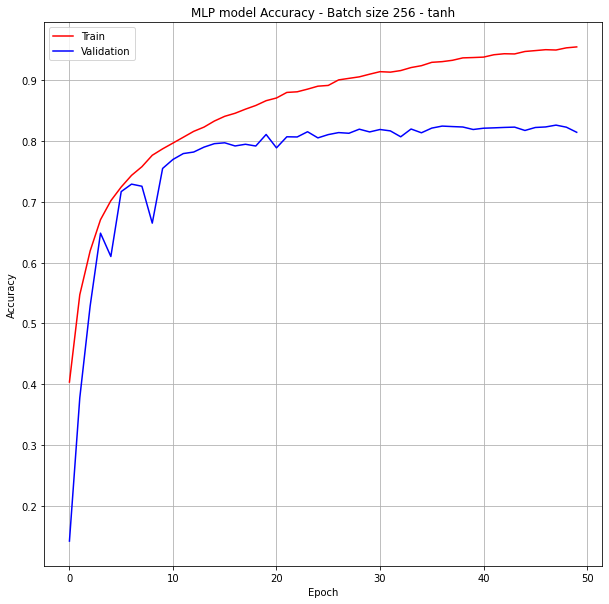


Plot the Loss Curves


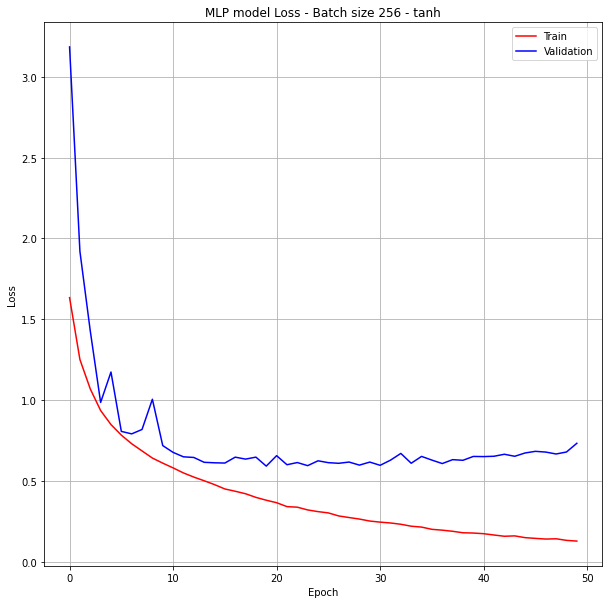


Test the model:
313/313 [==============================] - 3s 8ms/step - loss: 0.7568 - accuracy: 0.8086
Test Loss: 0.7567591071128845 , Test Accuracy: 0.8086000084877014

Plot Confusion Matrix:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1000
           1       0.95      0.87      0.91      1000
           2       0.82      0.67      0.74      1000
           3       0.57      0.72      0.63      1000
           4       0.74      0.84      0.79      1000
           5       0.72      0.73      0.72      1000
           6       0.85      0.88      0.86      1000
           7       0.86      0.84      0.85      1000
           8       0.92      0.87      0.90      1000
           9       0.88      0.90      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



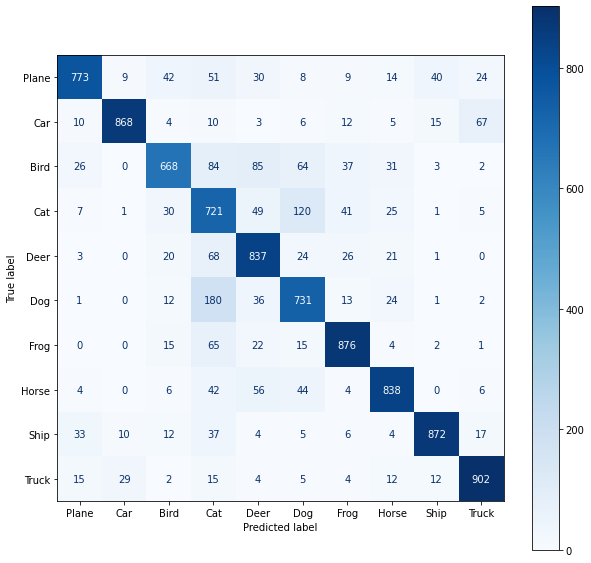

Job is done. learning time: 565 seconds


In [5]:
# Import TF and other requirements
print("Importing libraries.")
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import datasets, layers, models, Sequential, optimizers
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Import General libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import os

# Read Data
from six.moves import cPickle as pickle
import ssl
from keras.datasets import cifar10
import seaborn as sns

# Draw Flow chart
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

print("Libraries imported.\n")
# Creating directories if not exist.
from pathlib import Path
Path("figs").mkdir(parents=True, exist_ok=True)
Path("models").mkdir(parents=True, exist_ok=True)

# Defines:
question_part = "Q1PCC"
model_type = "MLP"

# Hyper-Parameters
num_training=49000
num_validation=1000
num_test=10000
# database path
data_path = 'cifar10'
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_count = len(classes)
# Optimizer type: sgd, adam
opt_type = 'sgd'
# Batch Size:
bs = 256
# Activation Function:
act_func = 'tanh'
# Epoch count:
ep_count = 50
# Loss metric:
loss_metric = 'categorical_crossentropy'

def model_plotter(model_history, metric, model_name, b_s, a_f):
    plt.figure()
    plt.plot(model_history.history[metric.lower()],'r')
    plt.plot(model_history.history['val_'+metric.lower()],'b')
    plt.title(model_name + ' model ' + metric.capitalize() + " - Batch size " + str(b_s) + " - " + a_f)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.savefig("figs/" + question_part + "_" + model_name + "_" + metric.lower() + "_" + str(b_s) + "_" + a_f + ".png")
    plt.show()

def read_data(path='cifar10'):
    xs = []
    ys = []
    for b in range(1,6):
        # load single batch of cifar
        filename = os.path.join(path, 'data_batch_%d' % (b, ))
        with open(filename, 'rb') as f:
            datadict = pickle.load(f, encoding='latin1')
            X = datadict['data'].reshape(10000, 3072)
            Y = np.array(datadict['labels'])
        xs.append(X)
        ys.append(Y)

    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    with open(os.path.join(path, 'test_batch'), 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        Xte = datadict['data'].reshape(10000, 3072)
        Yte = np.array(datadict['labels'])
    
    # Subsample the data
    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)
    x_val = Xtr[r_val].astype('float32')/255.0
    y_val = Ytr[r_val]

    # We can split data here, but we don't want.
    # x_train = Xtr[r_tr].astype('float32')/255.0
    # y_train = Ytr[r_tr]
    x_train = Xtr.astype('float32')/255.0
    y_train = Ytr

    x_test = Xte[r_te].astype('float32')/255.0
    y_test = Yte[r_te]
    return x_train, y_train, x_val, y_val, x_test, y_test

print("Reading data started.")
read_data_online = True
if read_data_online:
    # Read data, using Keras (Needs download):
    ssl._create_default_https_context = ssl._create_unverified_context
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    r_val = range(num_training, num_training + num_validation)
    r_tr = range(num_training)
    r_te = range(num_test)

    x_val = x_train[r_val].astype('float32')/255.0
    y_val = y_train[r_val]
    # x_train = x_train[r_tr].astype('float32')/255.0
    x_train = x_train.astype('float32')/255.0
    # y_train = y_train[r_tr]
    x_test = x_test[r_te].astype('float32')/255.0
    y_test = y_test[r_te]
    xtr_img = x_train
    xte_img = x_test
else:
    # Read data, using the defined function (locally - Downloaded file):
    x_train, y_train, x_val, y_val, x_test, y_test = read_data(data_path)
    xtr_img = x_train.reshape(len(x_train), 3, 32, 32).transpose([0, 2, 3, 1])
    xte_img = x_test.reshape(len(x_test), 3, 32, 32).transpose([0, 2, 3, 1])

# Making classes one hot for the sake of model training:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, class_count)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, class_count)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, class_count)


print("Reading data finished.\n")

print("Creating the model.")
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC1_h_128_' + act_func))
model.add(tf.keras.layers.Dense(128, activation = act_func, name = 'FC2_h_128_' + act_func))
model.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'FC3_o_10_Softmax'))
if opt_type=='adam':
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0009)
else:
    # opt_type=='sgd'
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, name=opt_type.upper())
METRICS = [
    'accuracy',
    # tf.keras.metrics.Precision(name='precision'),
    # tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer = opt, loss = loss_metric, metrics = METRICS)
model.summary()

print("Model created.\n")

print("Learn the model, Batch size =", bs)
t = time.time()
# .reshape(len(x_train),-1)
model_learning = model.fit(x_train, y_train_one_hot, epochs = ep_count, batch_size=bs, validation_split=0.2, shuffle=True)
t = time.time()-t

print("\nPlot the Accuracy Curves")
model_plotter(model_learning, 'accuracy', model_type, bs, act_func)

print("\nPlot the Loss Curves")
model_plotter(model_learning, 'loss', model_type, bs, act_func)

model.save("models/cifar10_" + question_part + "_" + model_type + "_bs" + str(bs) + "_" + act_func + ".h5")

# Model Testing:
print("\nTest the model:")
# .reshape(len(x_test),-1)
model_test_result = model.evaluate(x_test, y_test_one_hot)
print("Test Loss:", model_test_result[0], ", Test Accuracy:", model_test_result[1])

print("\nPlot Confusion Matrix:")
# Confusion Matrix:
# .reshape(len(x_test),-1)
y_pred_softmax = model.predict(x_test)
y_pred = [np.argmax(y) for y in y_pred_softmax]

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams["figure.figsize"] = (10,10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("figs/" + question_part + "_" + model_type + "_confusion_" + str(bs) + "_" + act_func +  ".png")
plt.show()

print("Job is done. learning time:", int(t), "seconds")